# 0 - Load modules

In [2]:
import sys
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import glob
from netCDF4 import Dataset
import cartopy.crs as ccrs
import json
import os
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
reg='GS'
config='GS36'
case='MPC001'

In [16]:
def plot_prof(maxdep,dm,ref,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model):


    fig, axs = plt.subplots(1,2, figsize=(10, 10))
    axs = axs.ravel()
    title = 'Profile for '+ref+' maxdepth for en4 = '+str(d)+' for model = '+str(dm)
    plt.suptitle(title,size = 25,y=1.05)

    axs[0].plot(mean_temp_model,vert_standart,'r.-', label=reg+'36-75')
    axs[0].plot(temp_en4,vert_standart,'k.-', label='EN4 obs')
    axs[0].set_ylabel('Depth [m]', size=14)
    axs[0].set_ylabel('Temperature [degC]', size=14)
    axs[0].grid(True, which='both')
    axs[0].set_ylim(maxdep, 0)
    axs[0].xaxis.tick_top()
    axs[0].xaxis.set_label_position('top') 
    axs[0].plot(percent10_temp_model,vert_standart,'r:')
    axs[0].plot(percent90_temp_model,vert_standart,'r:')

    axs[1].plot(mean_salt_model,vert_standart,'r.-', label=reg+'36-75')
    axs[1].plot(salt_en4,vert_standart,'k.-', label='EN4 obs')
    axs[1].set_ylabel('Depth [m]', size=14)
    axs[1].set_ylabel('Salinity [PSU]', size=14)
    axs[1].grid(True, which='both')
    axs[1].set_ylim(maxdep, 0)
    axs[1].xaxis.tick_top()
    axs[1].xaxis.set_label_position('top') 
    axs[1].plot(percent10_salt_model,vert_standart,'r:')
    axs[1].plot(percent90_salt_model,vert_standart,'r:')

    plt.legend()
    fig.tight_layout()
    plt.savefig('Plots/Plot_profile_'+ref+'.png')


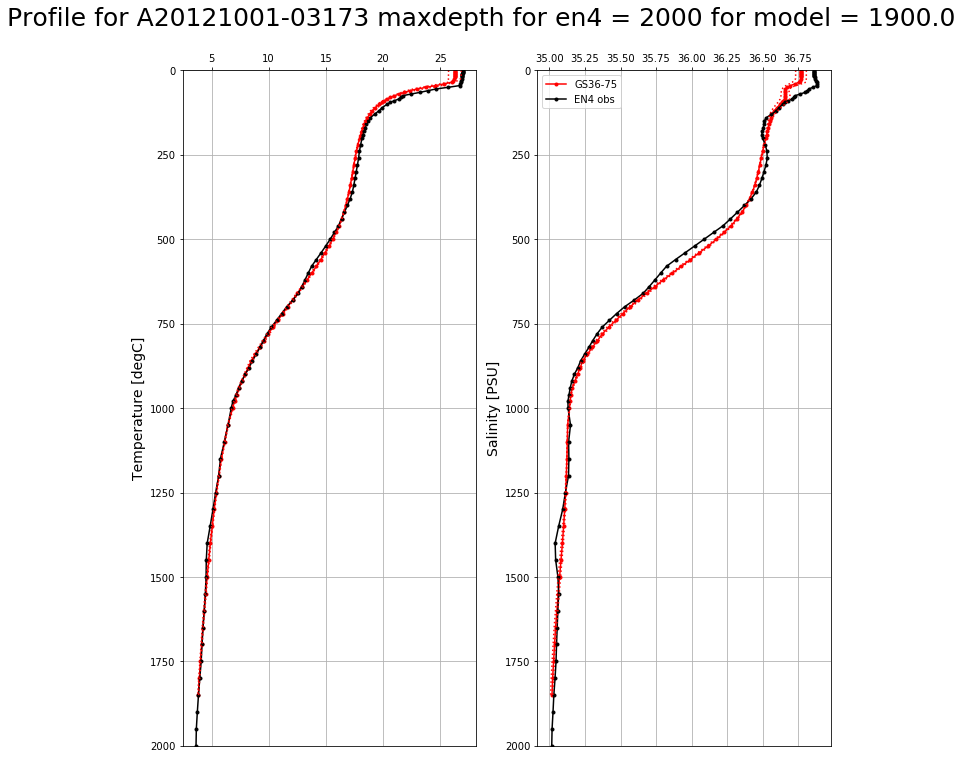

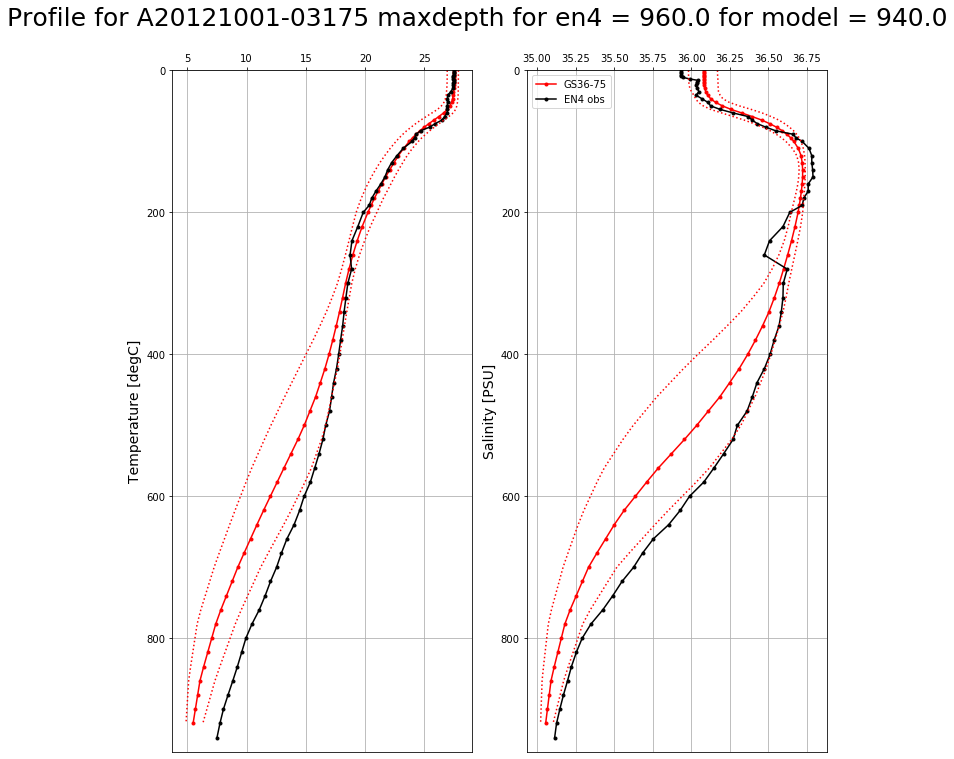

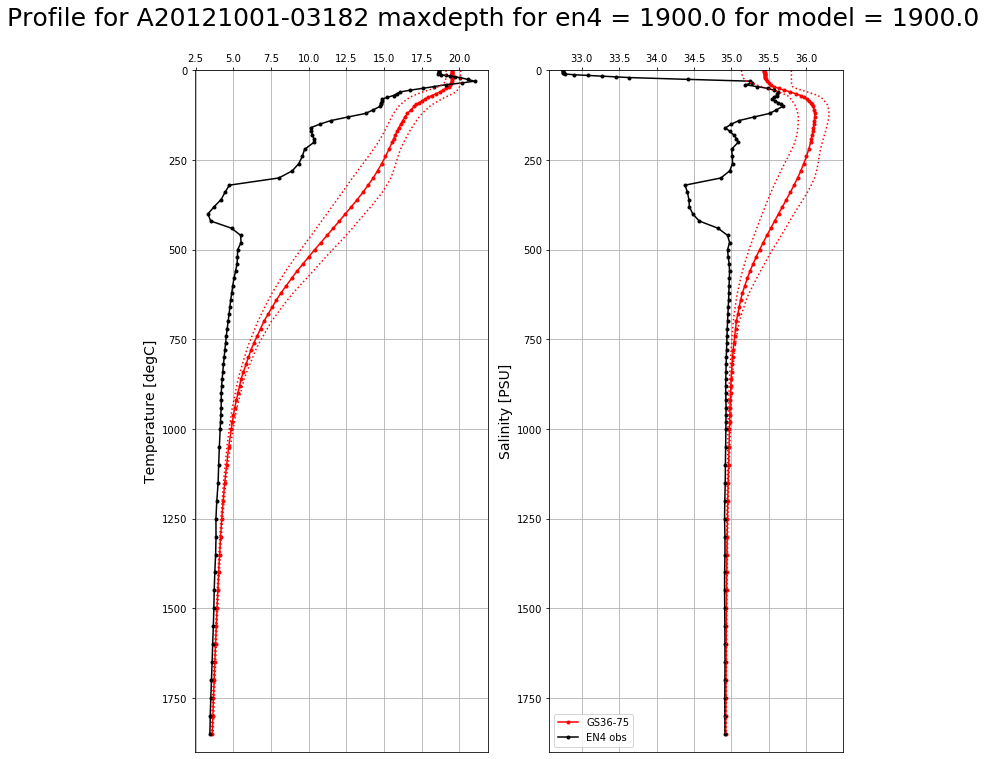

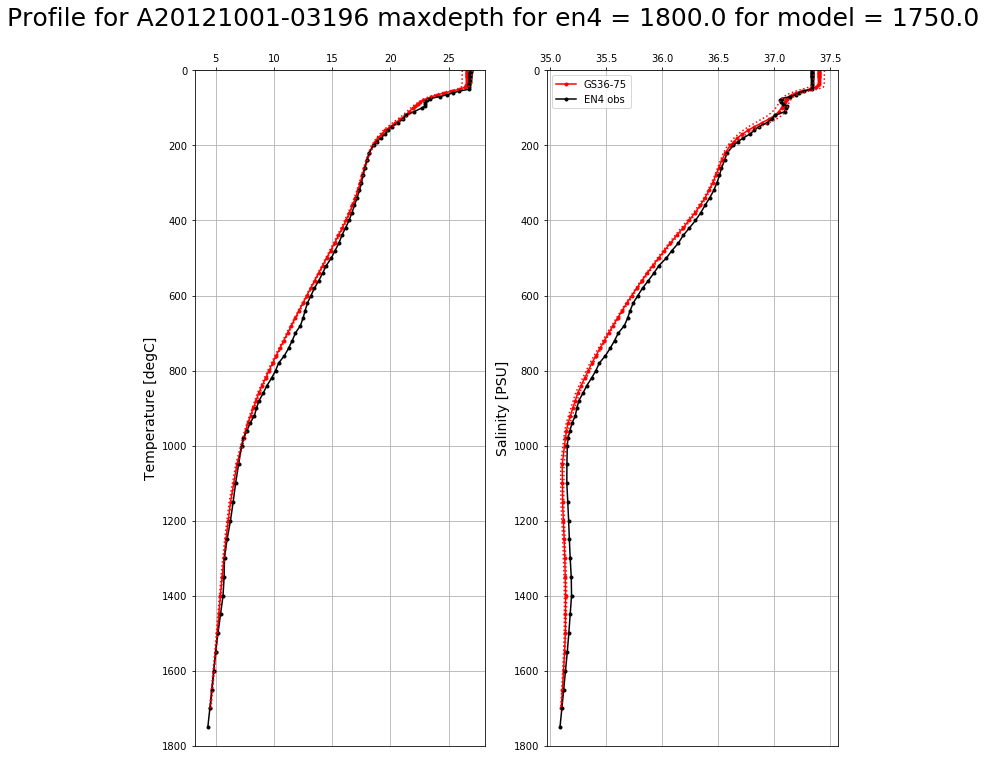

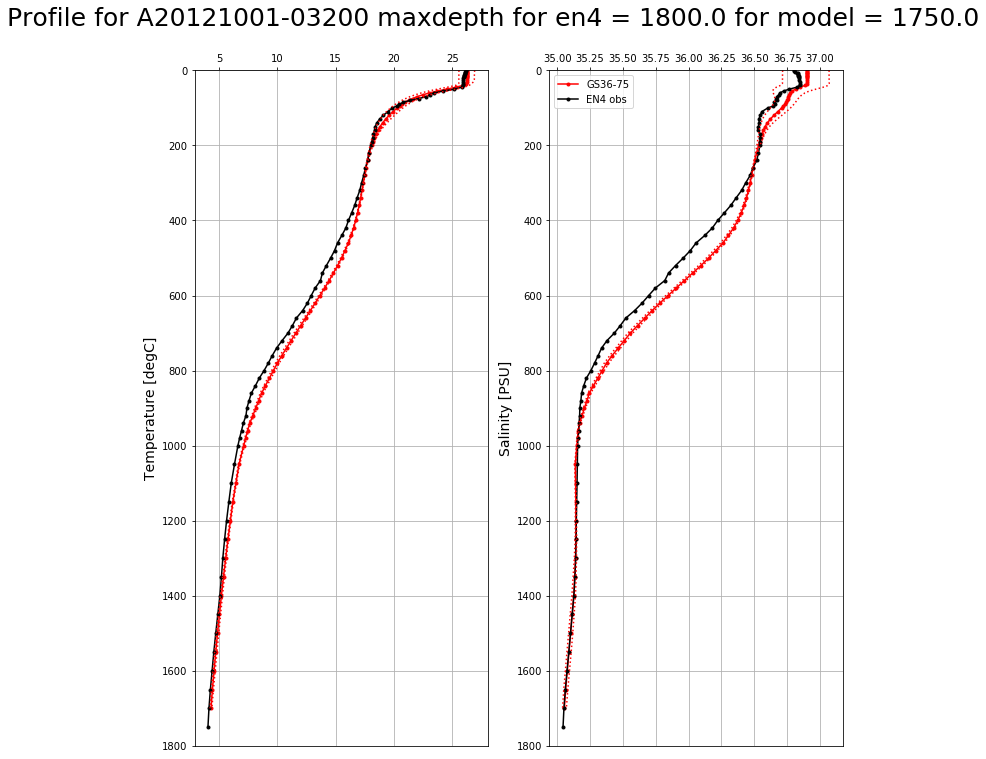

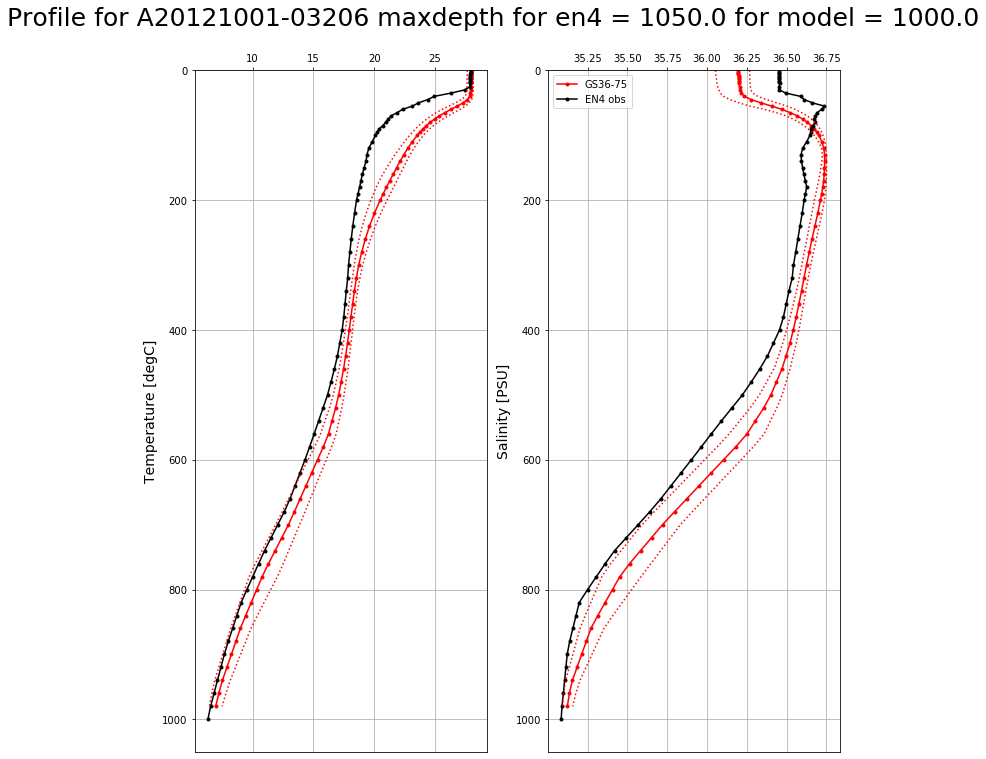

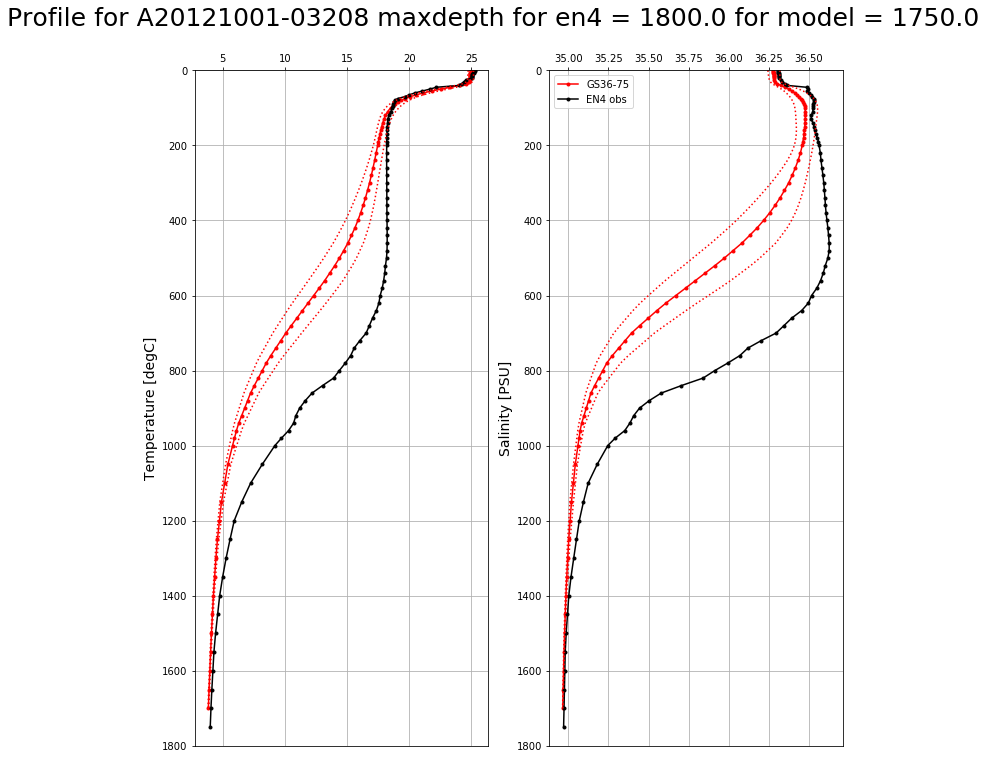

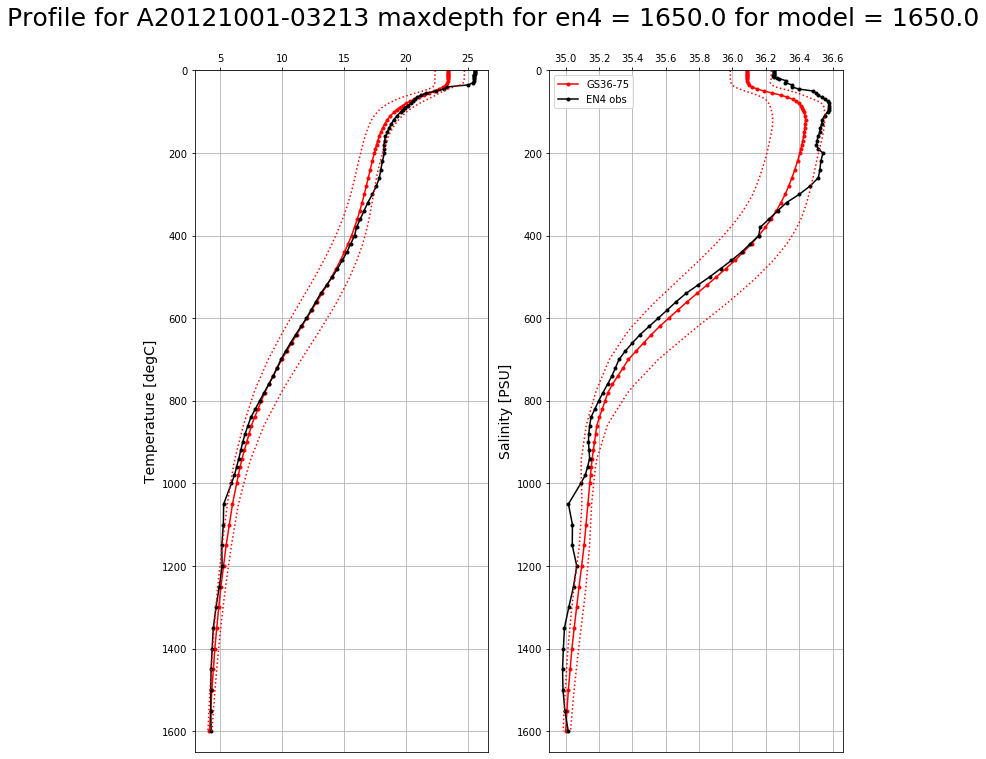

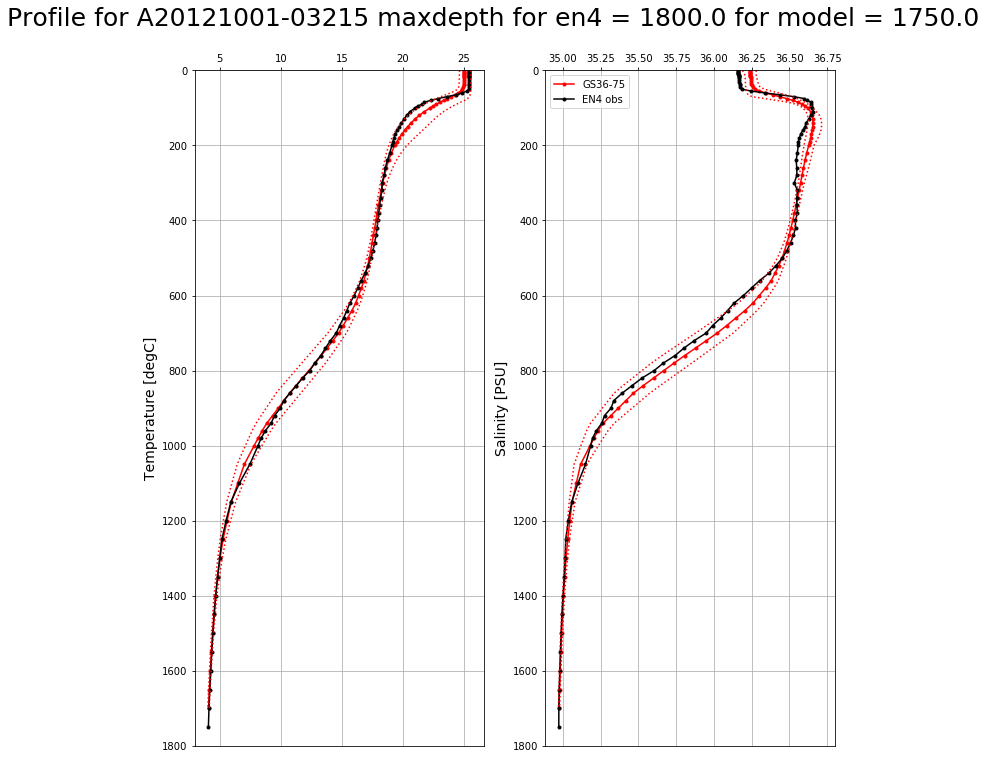

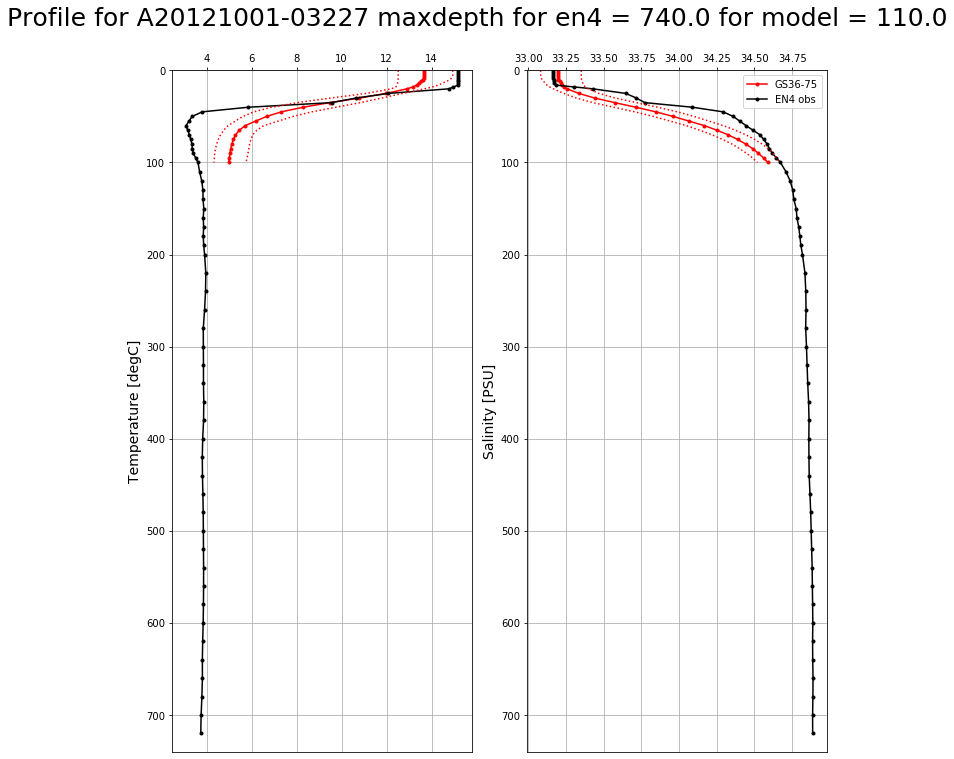

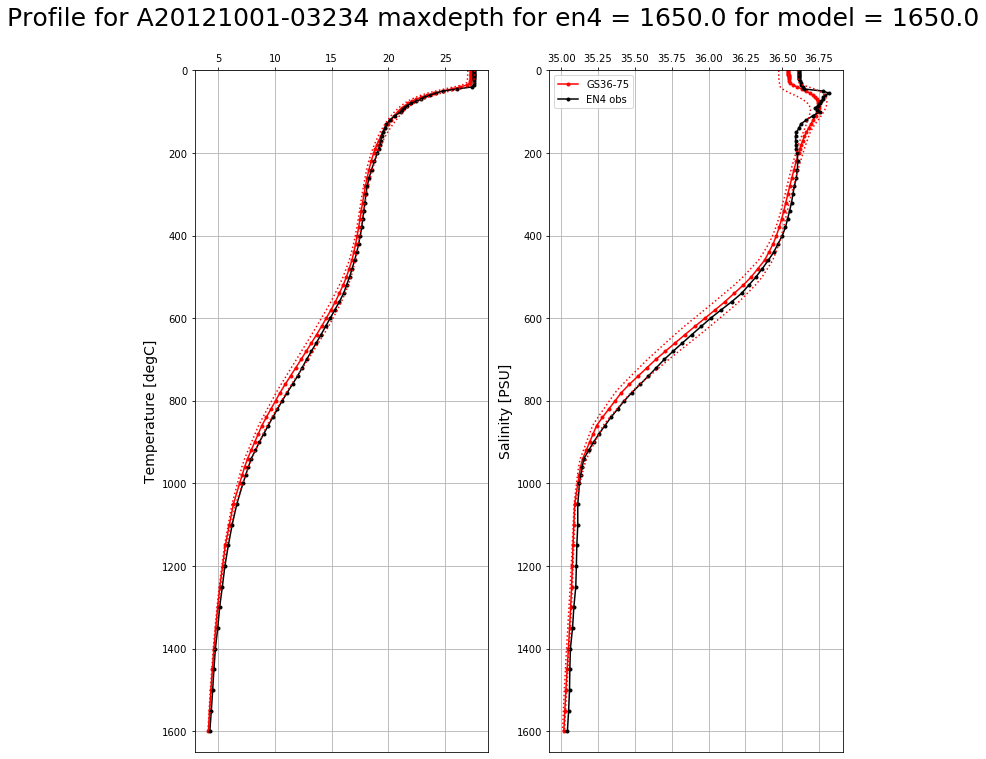

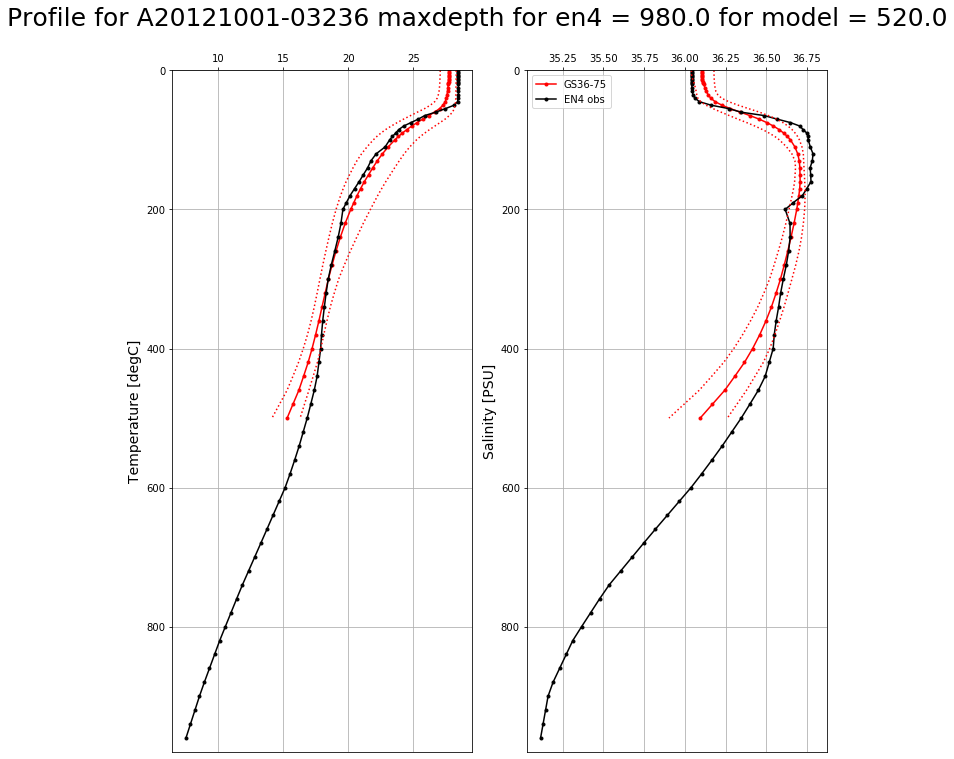

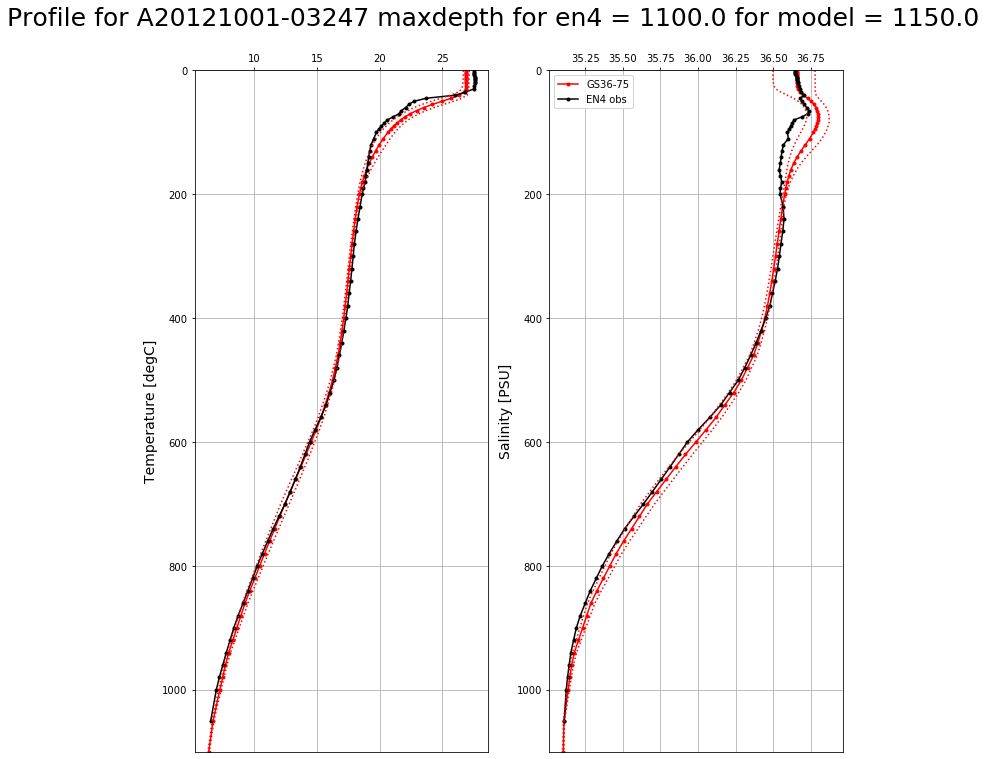

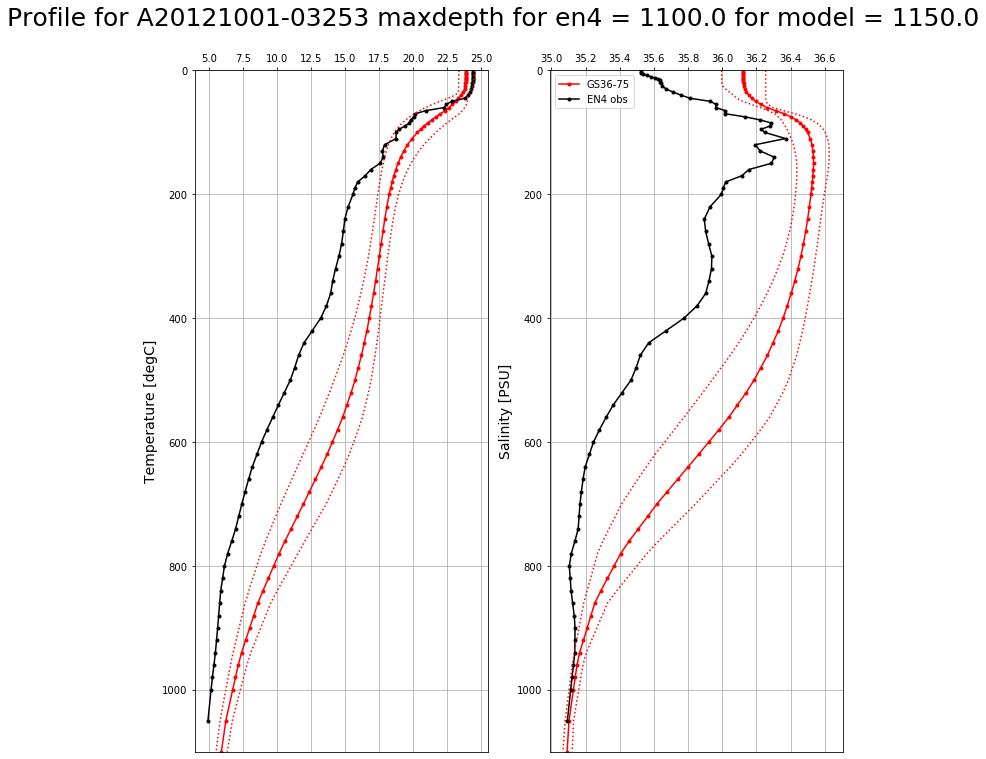

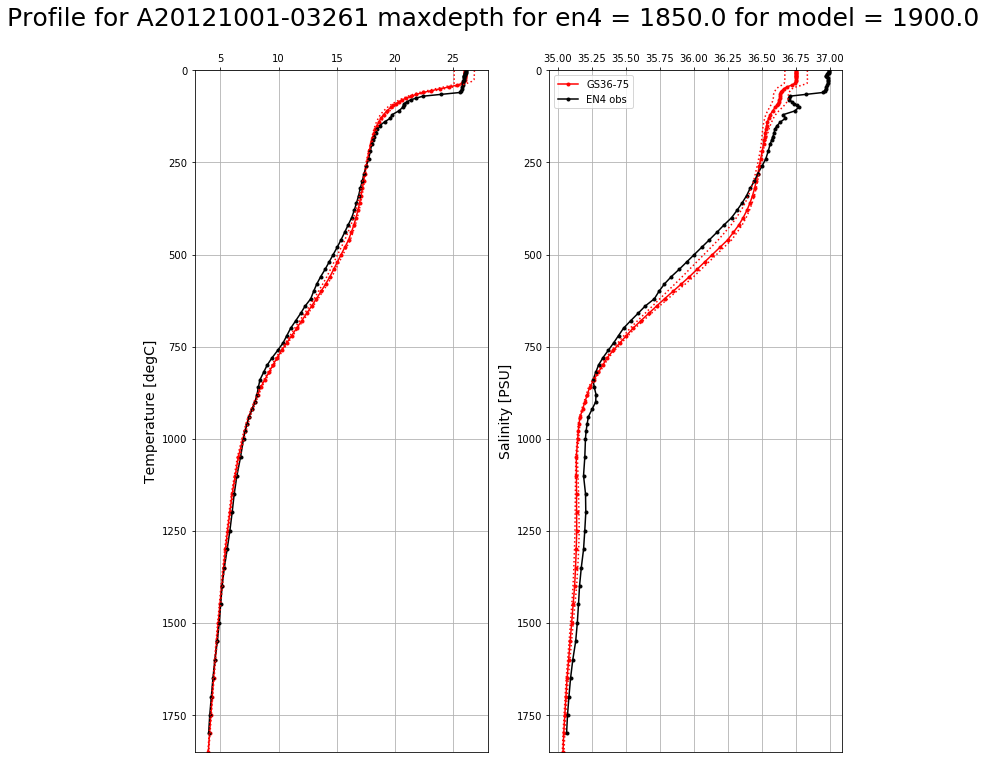

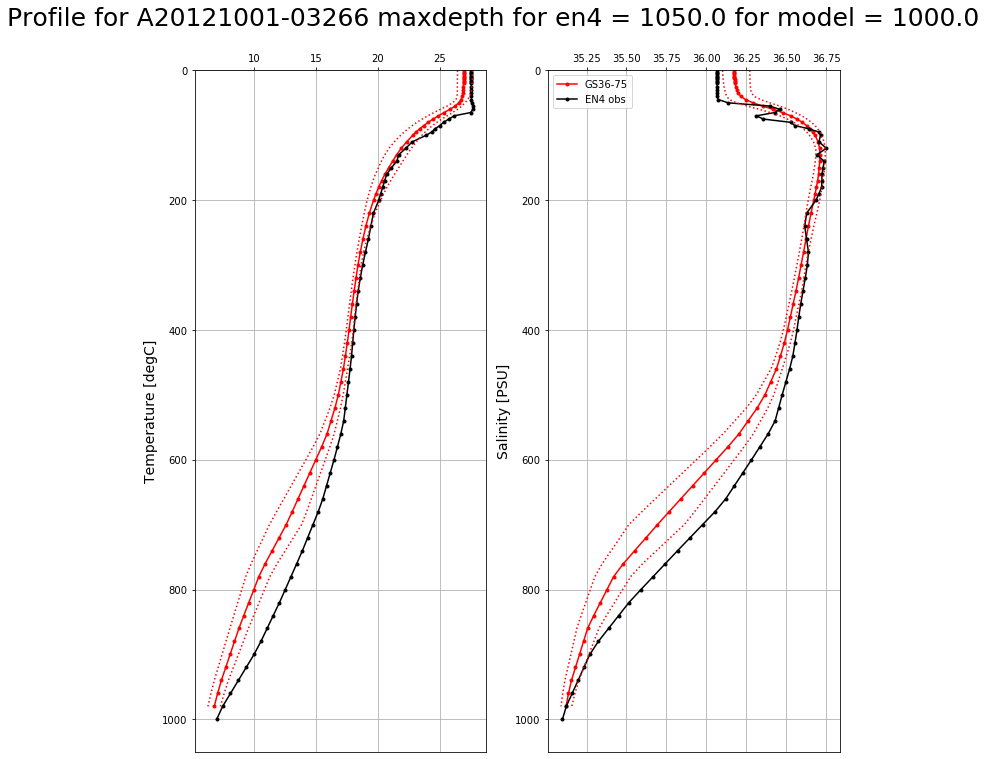

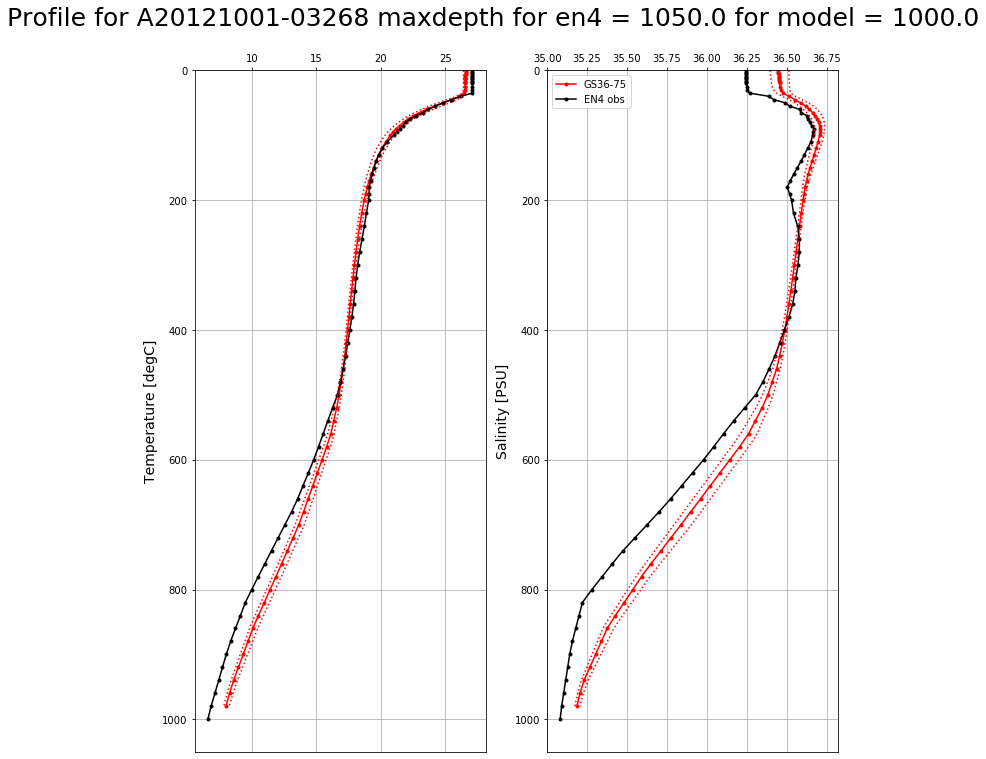

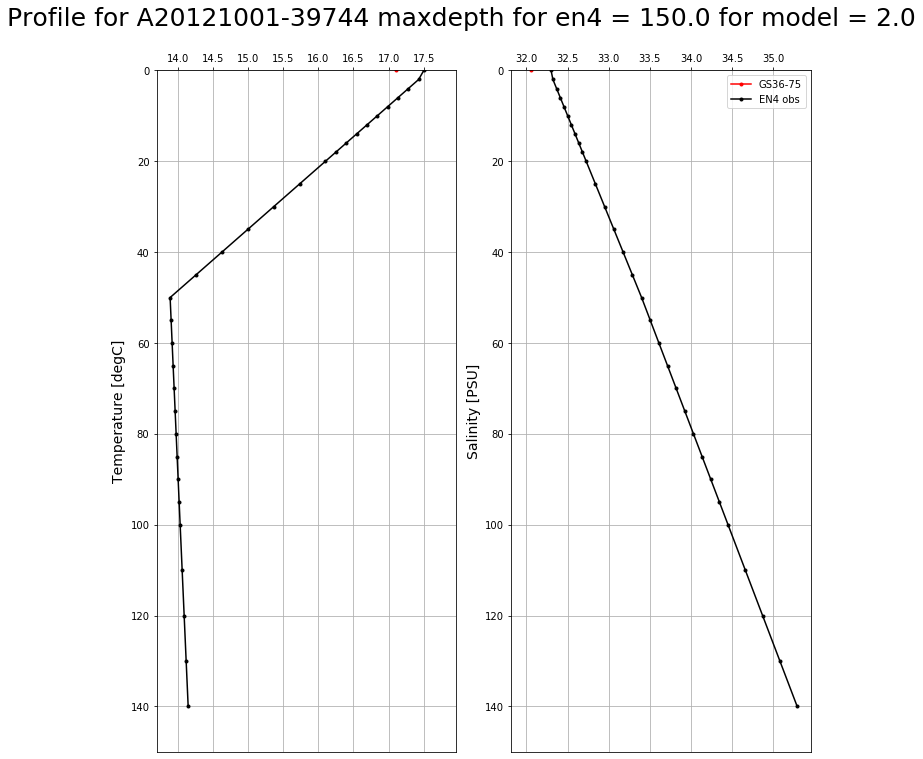

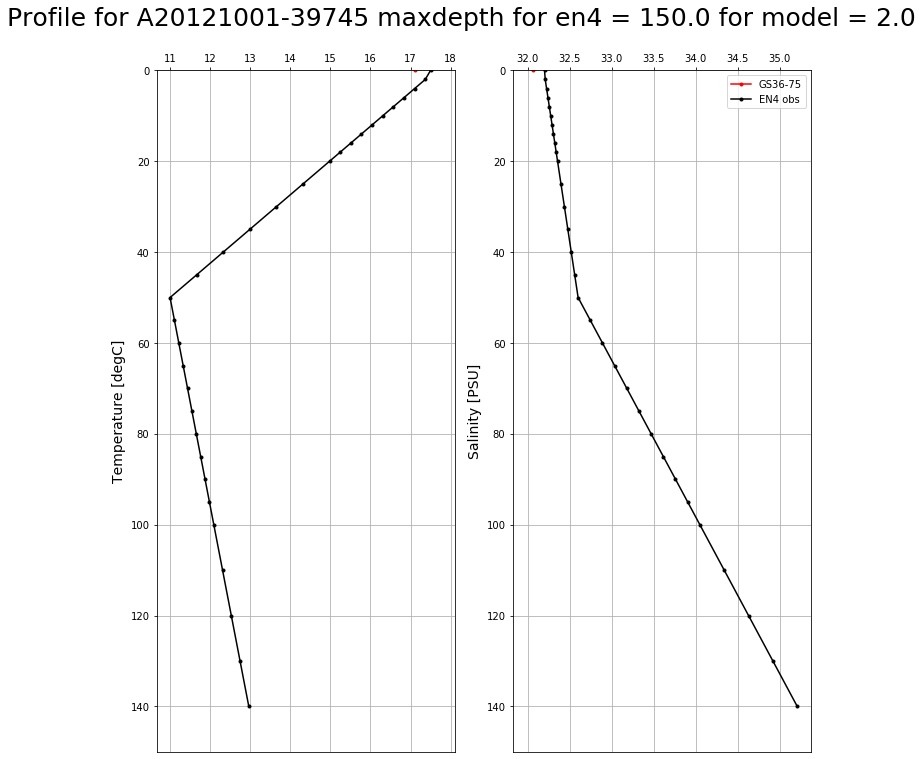

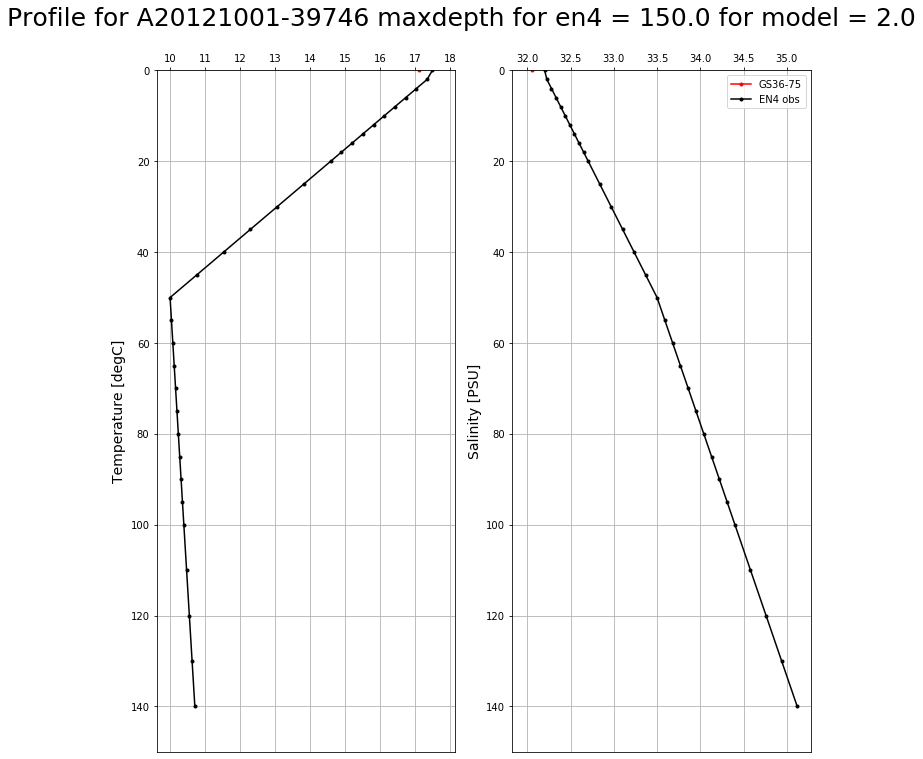

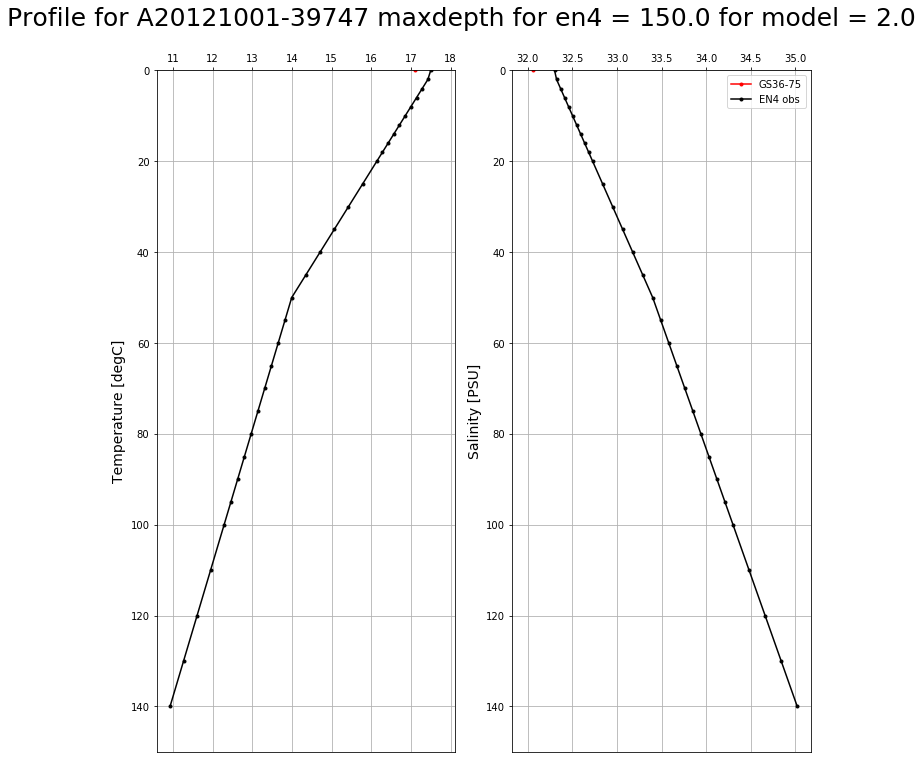

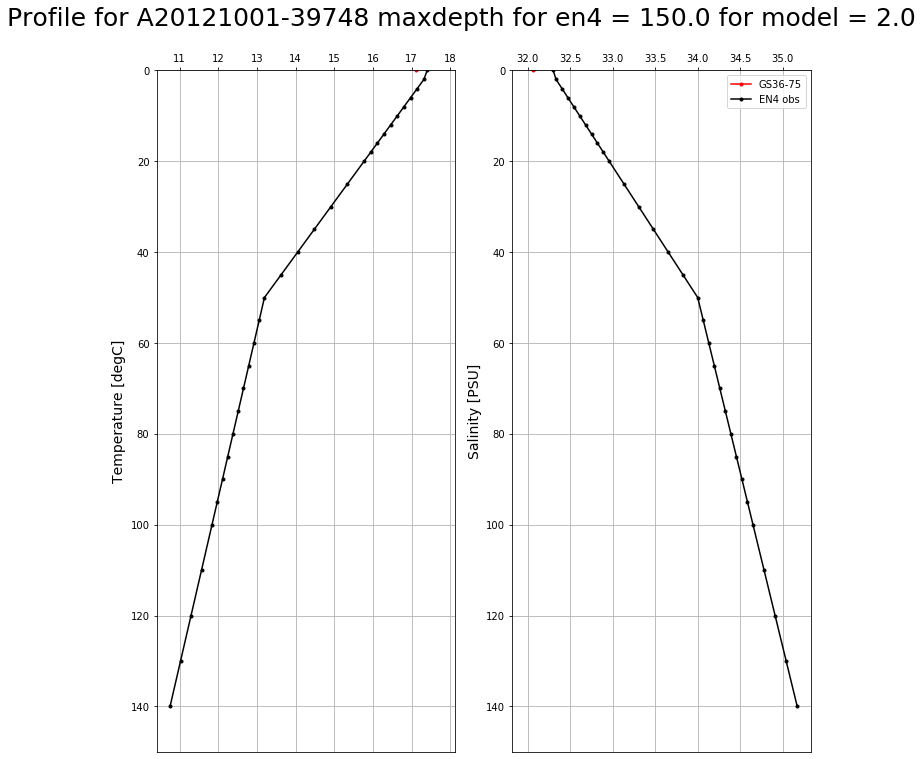

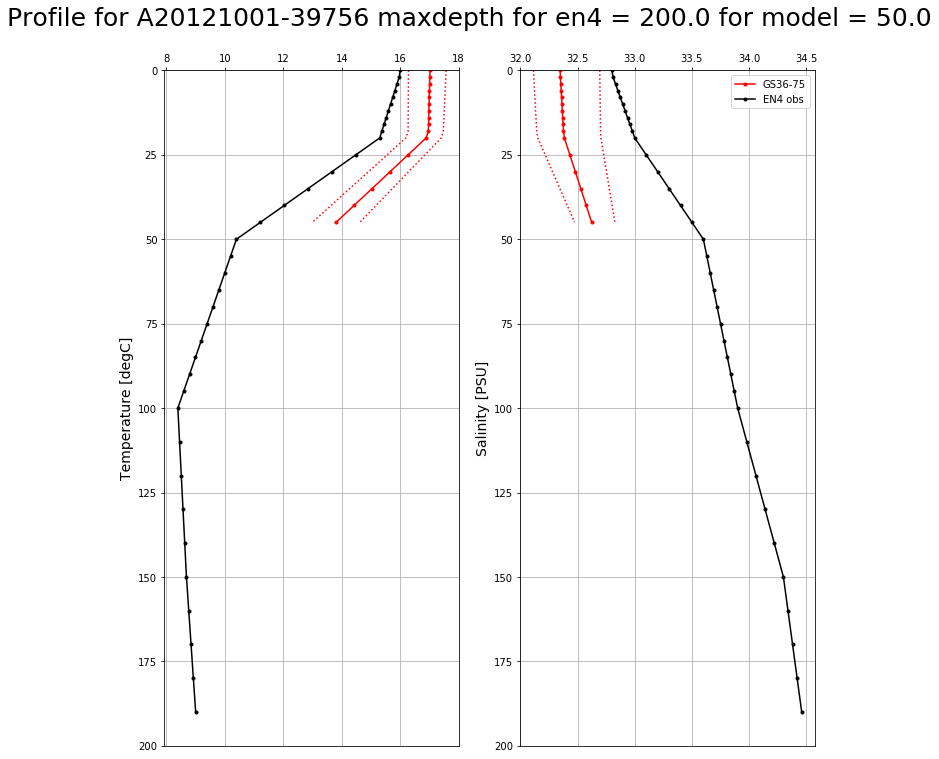

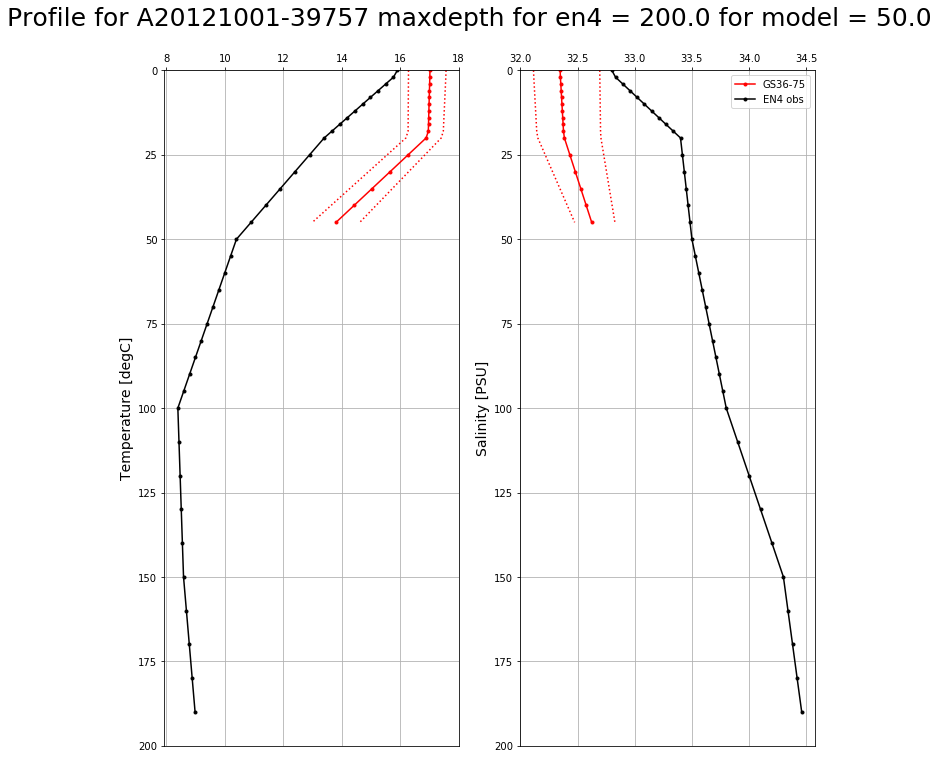

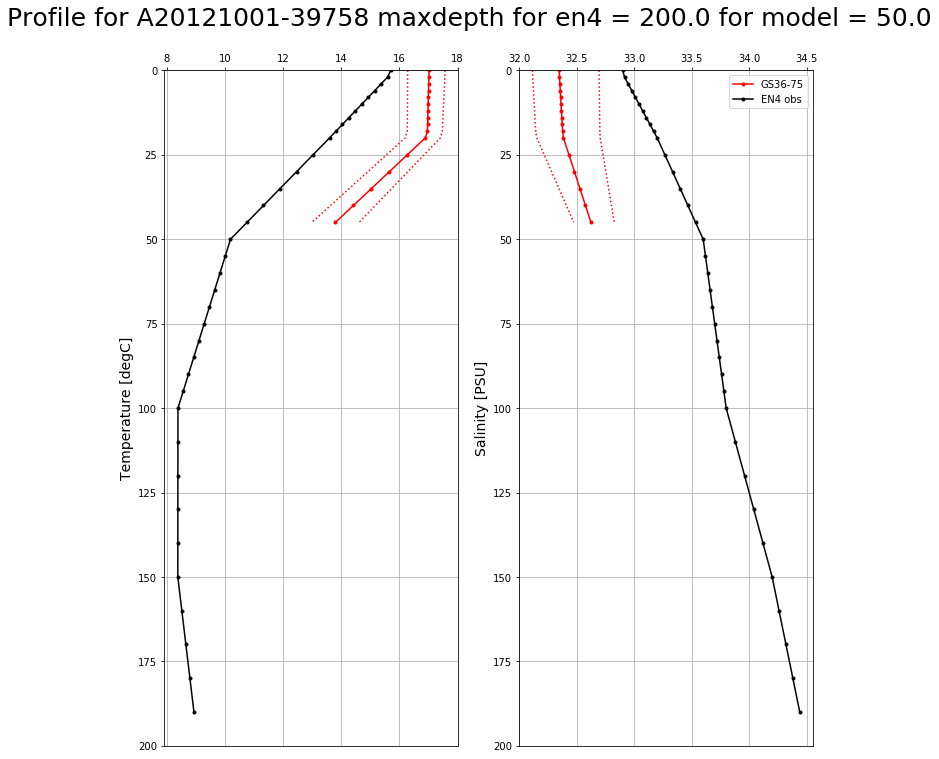

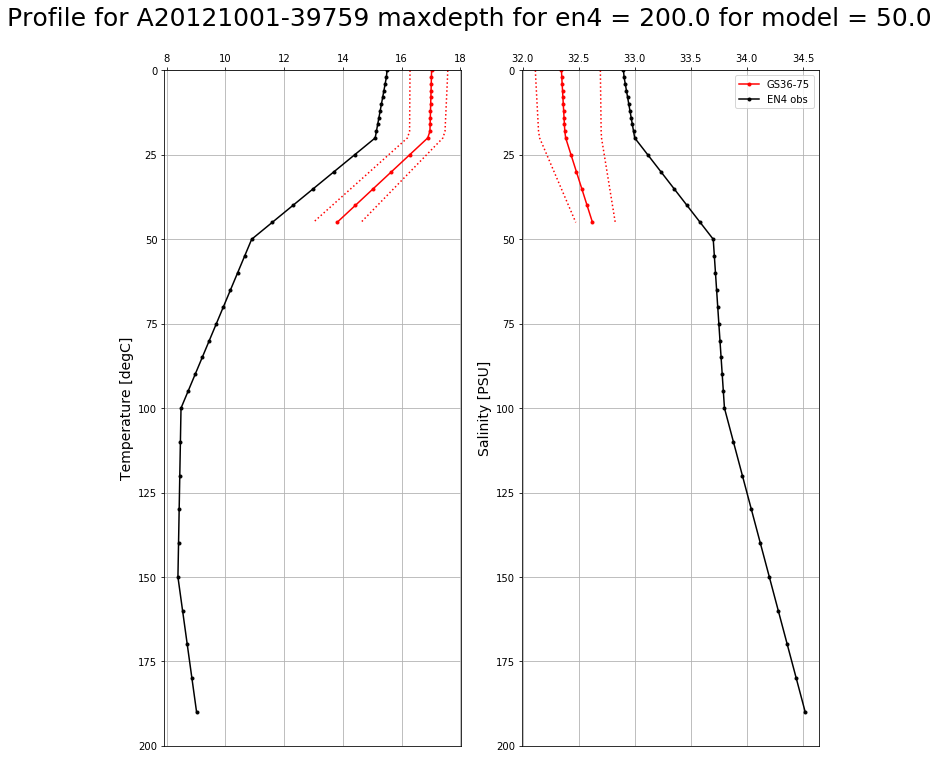

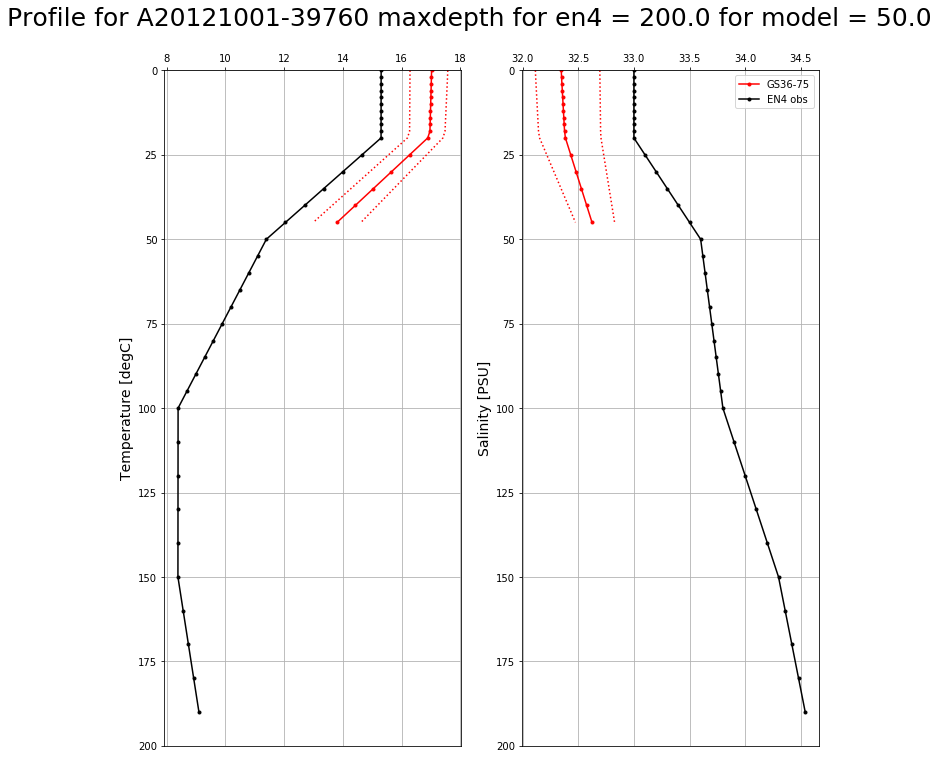

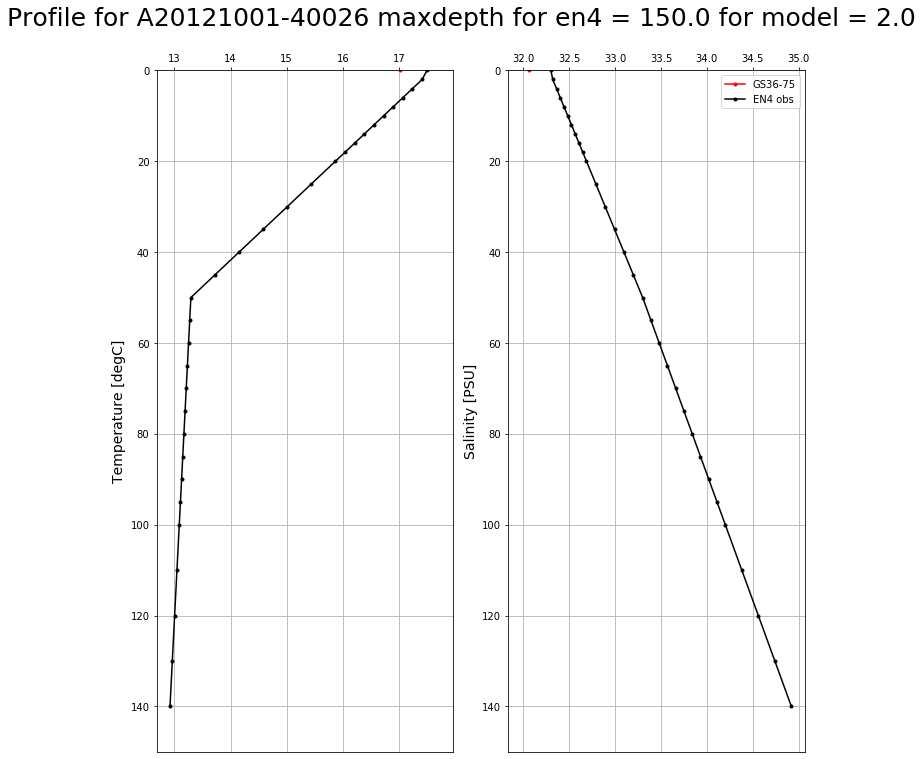

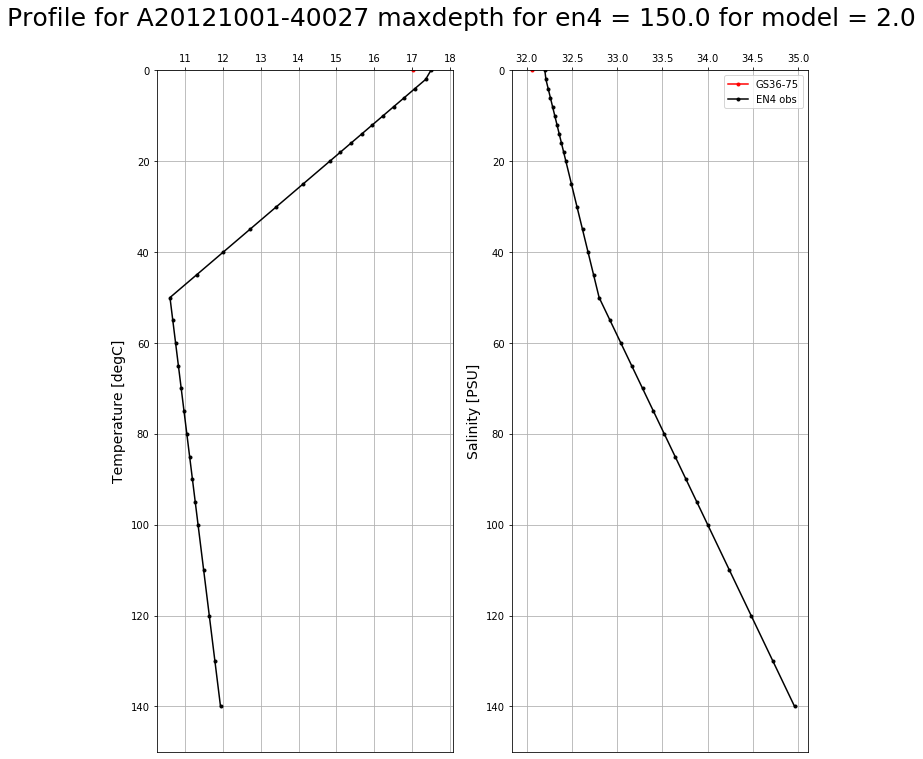

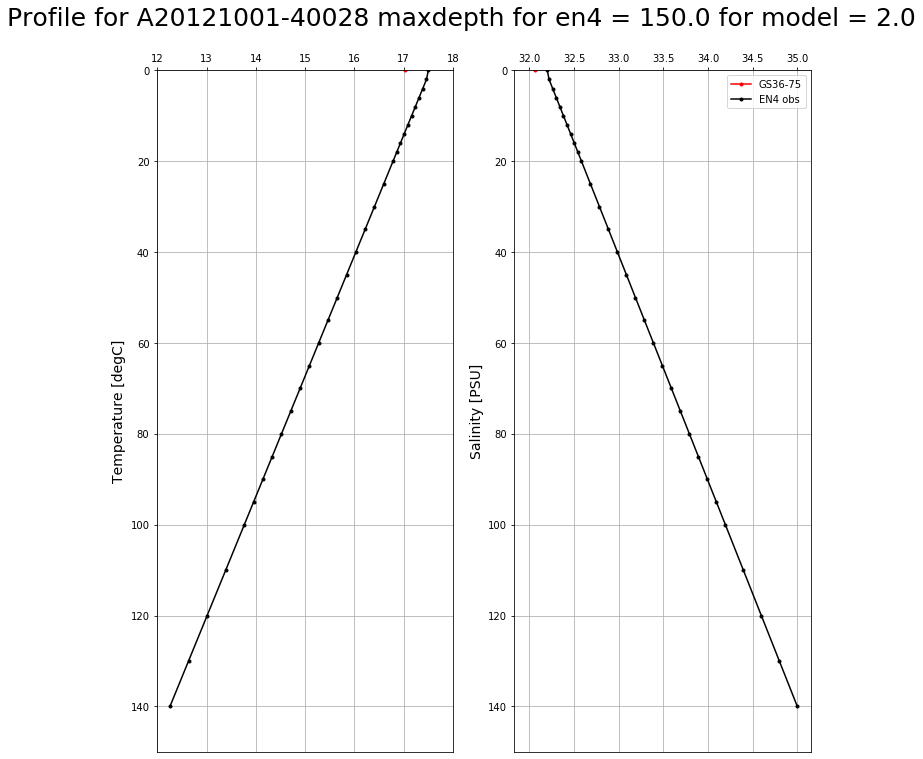

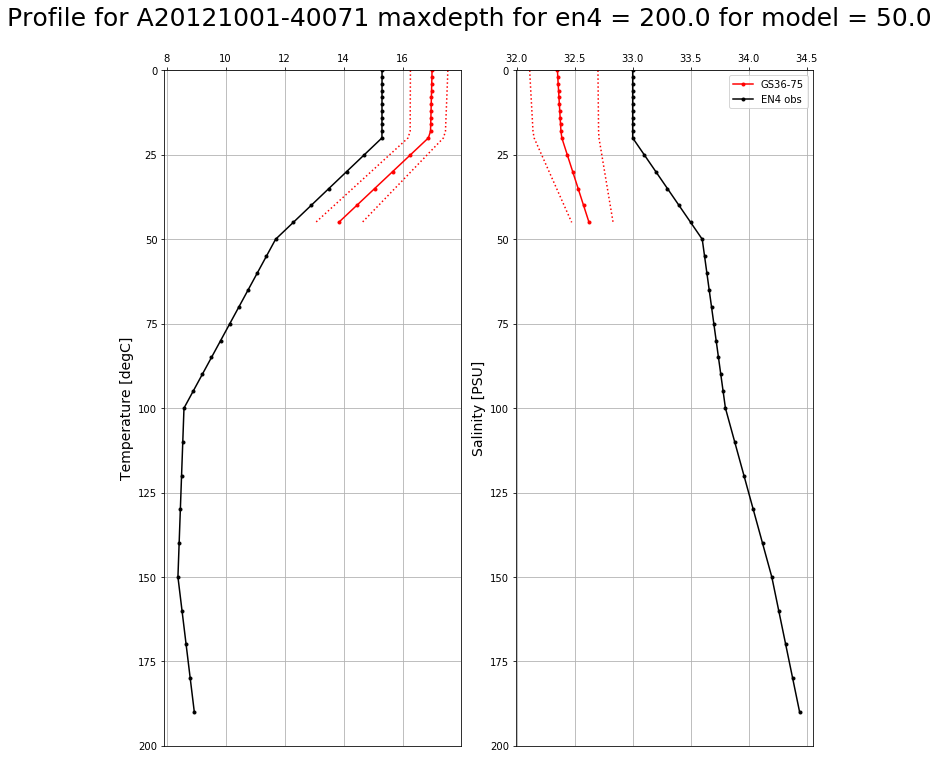

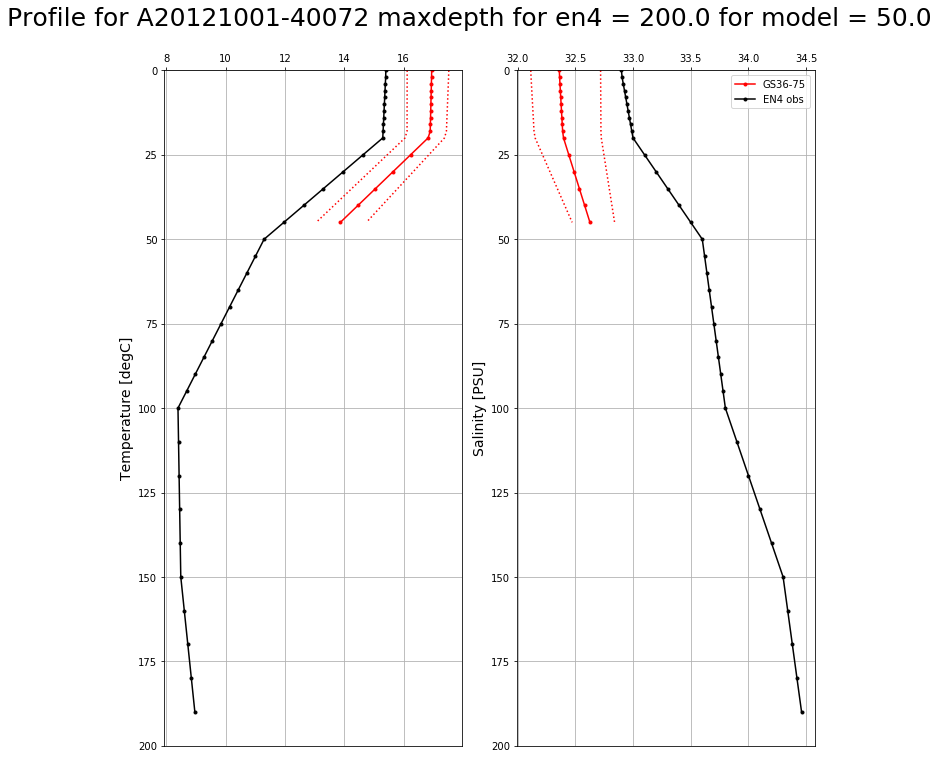

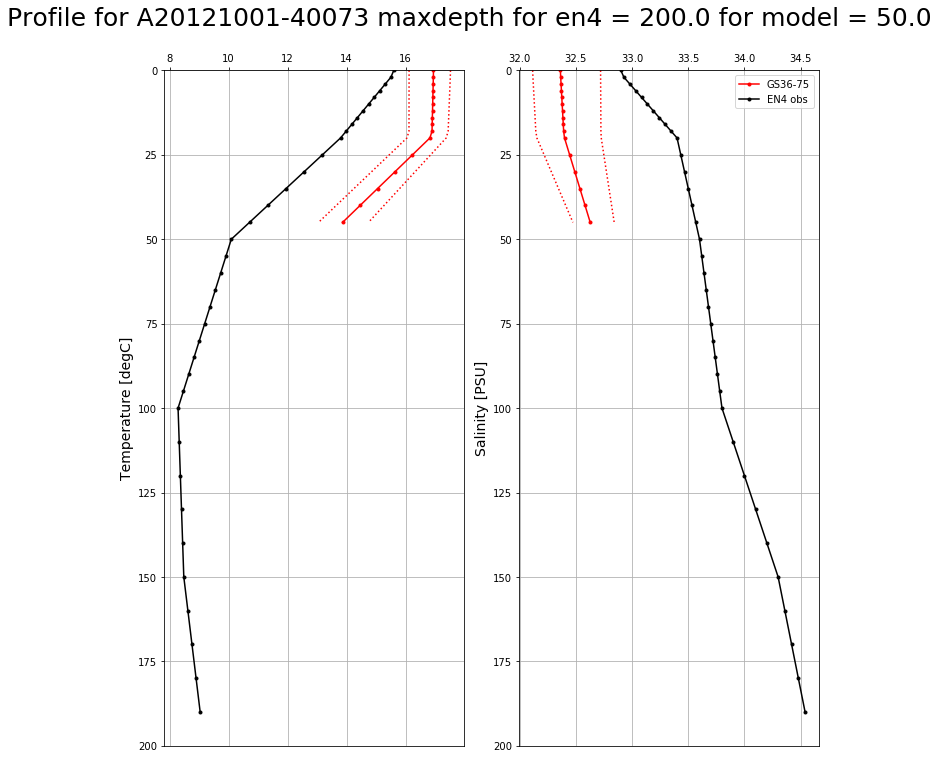

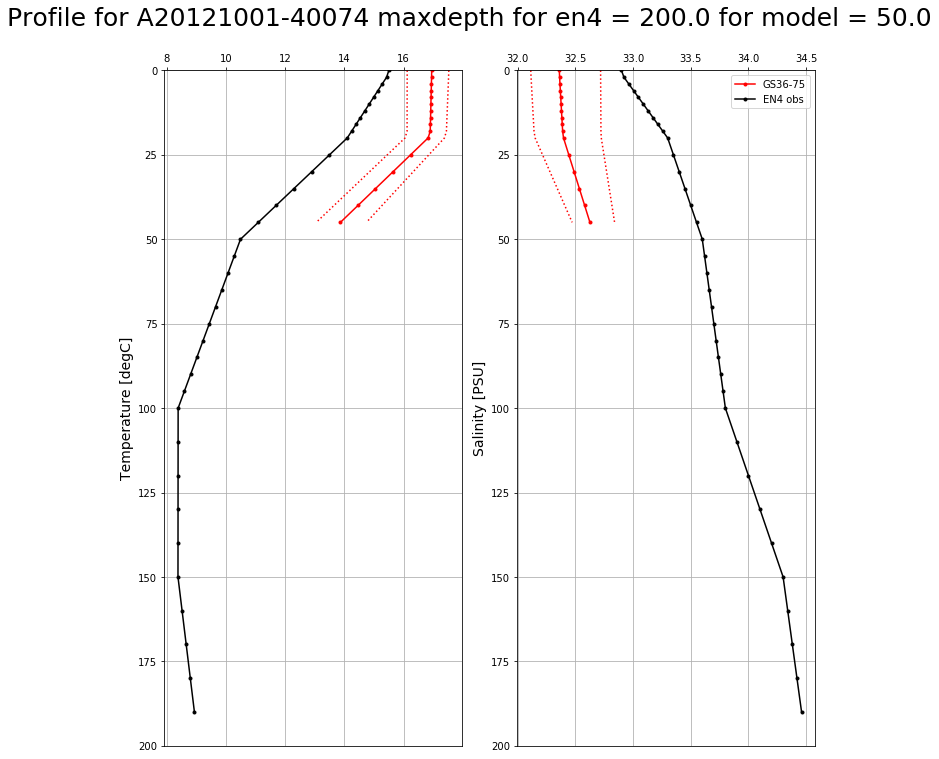

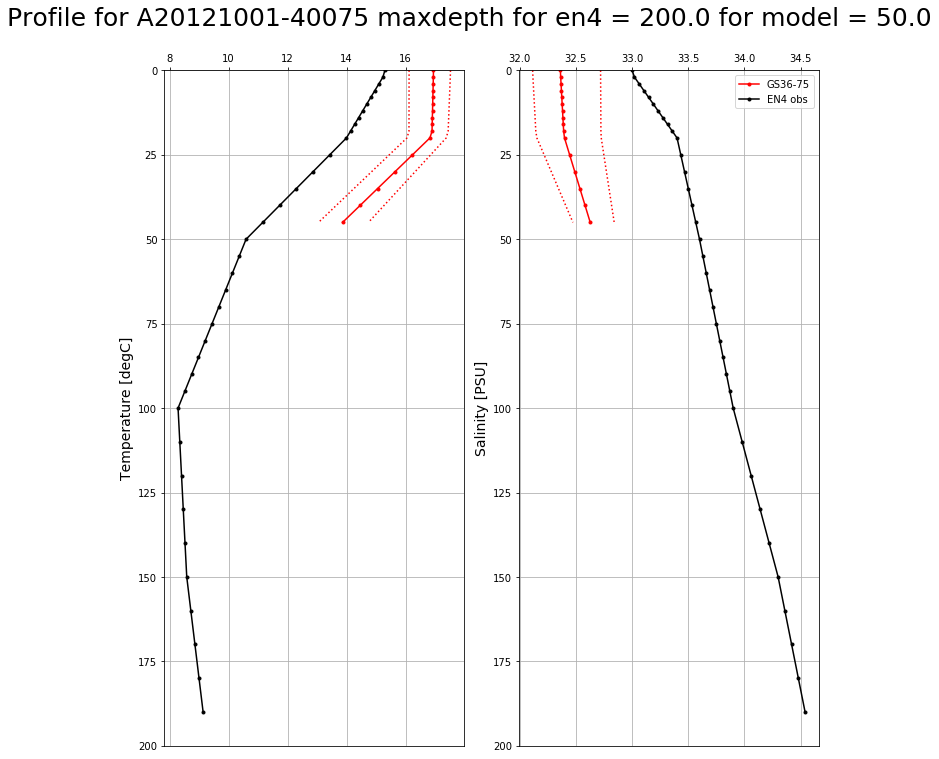

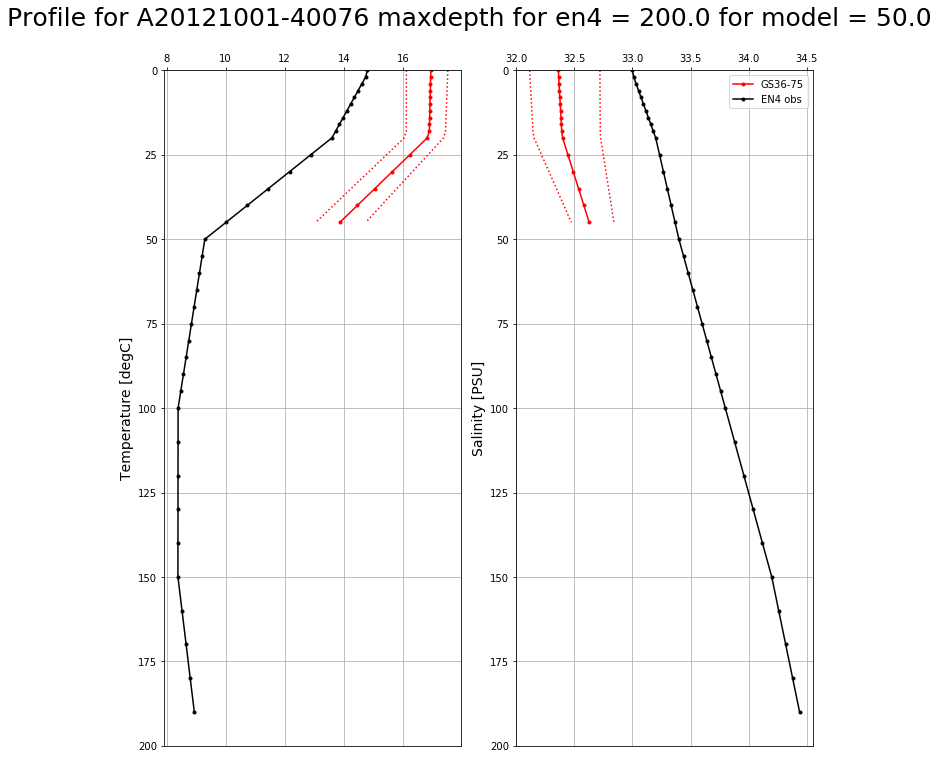

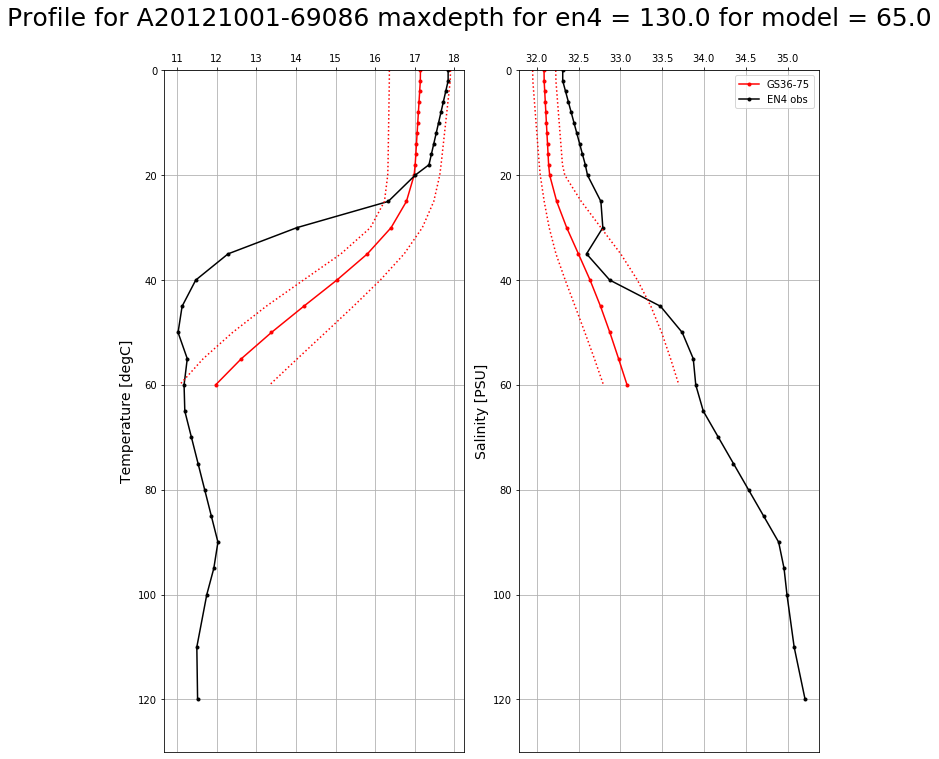

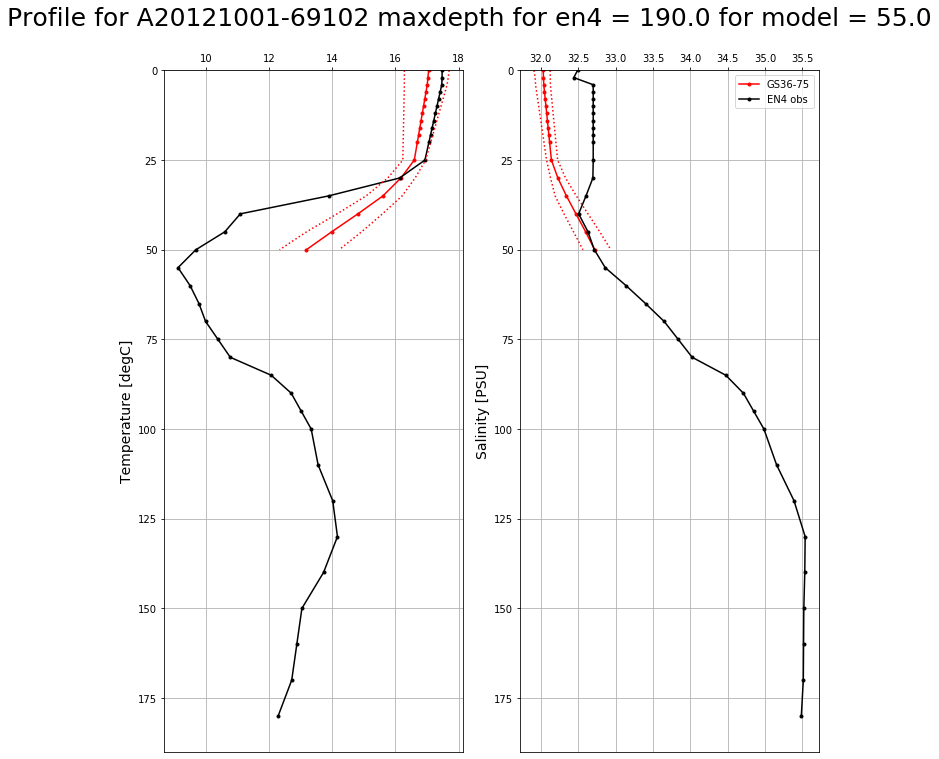

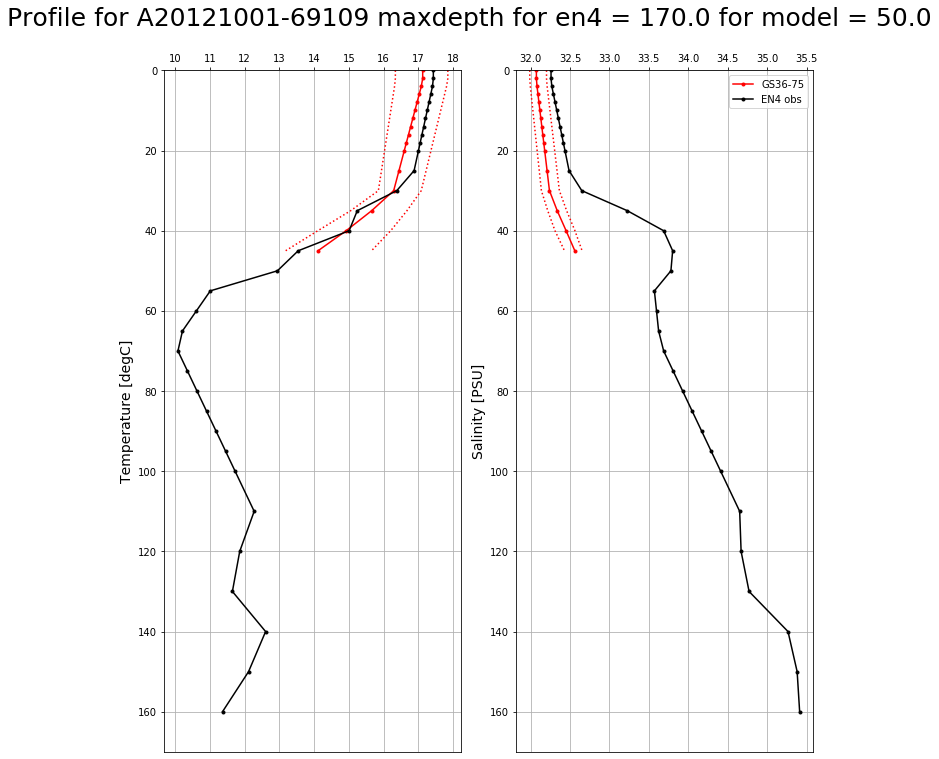

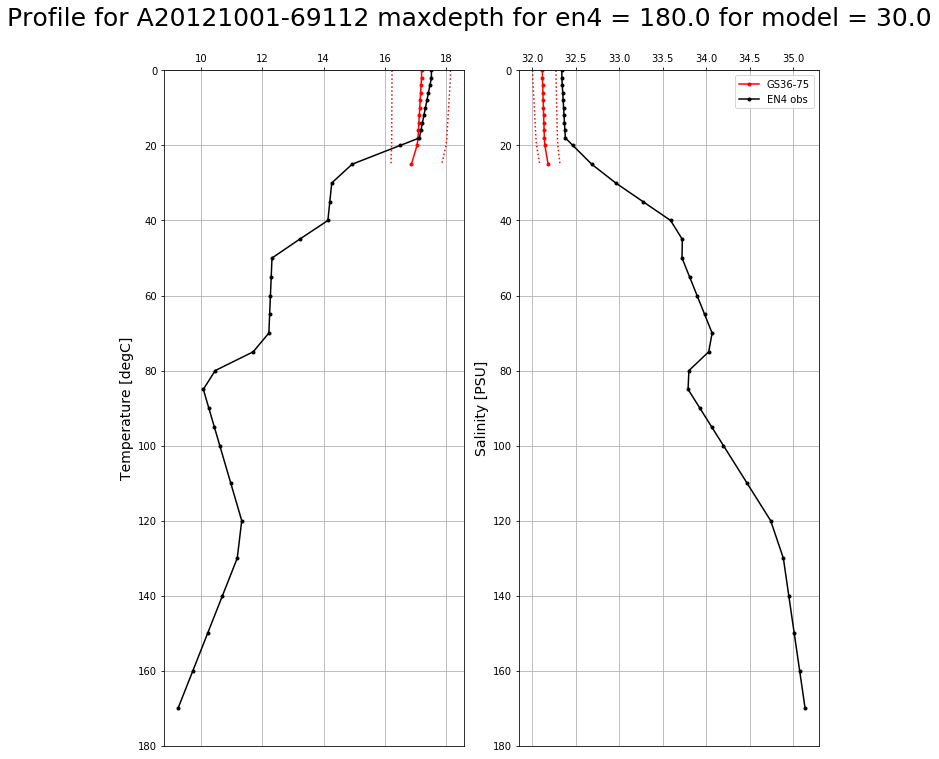

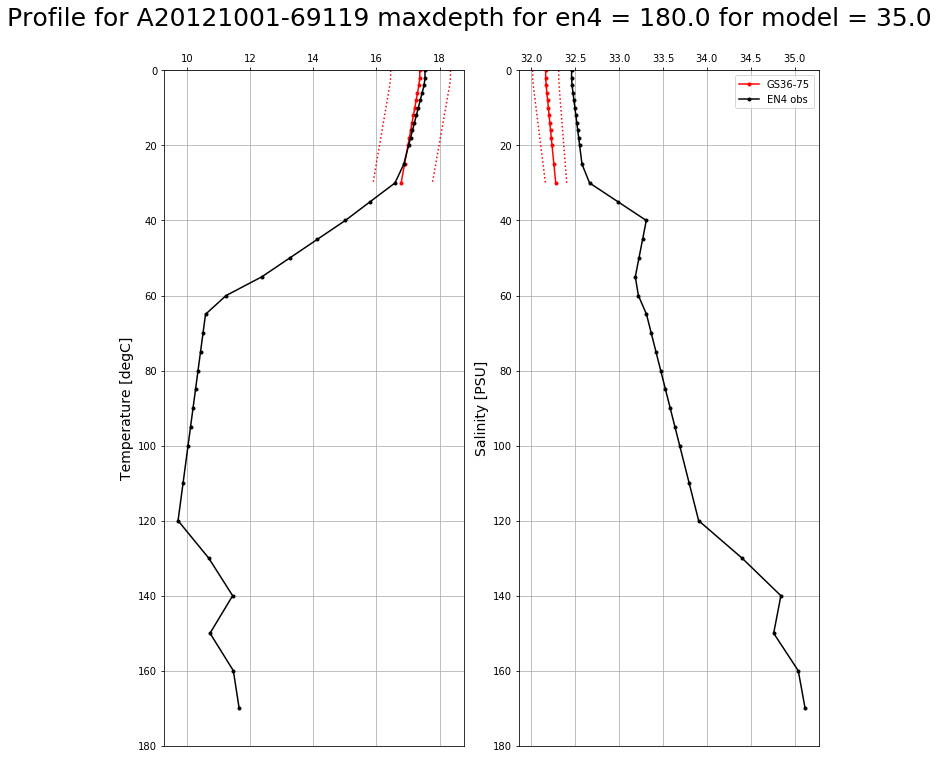

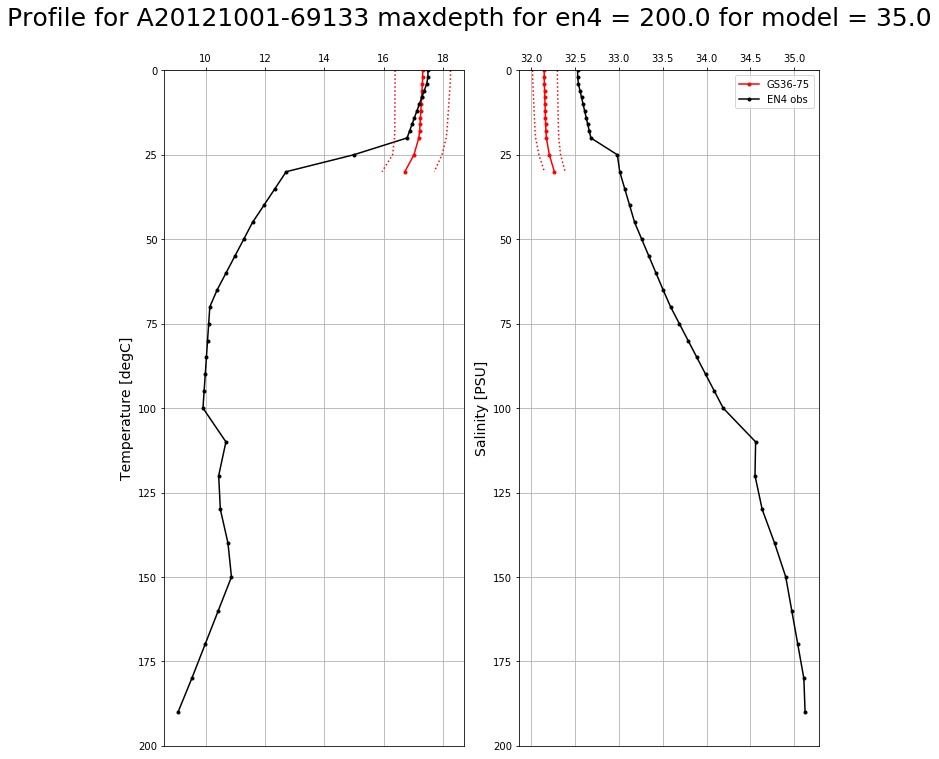

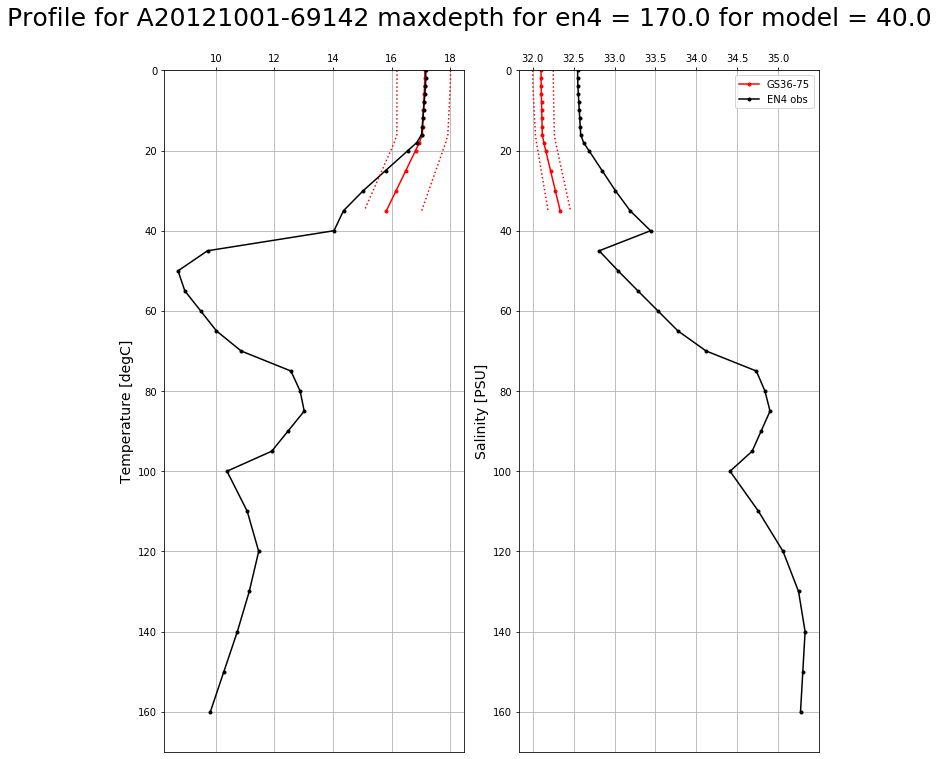

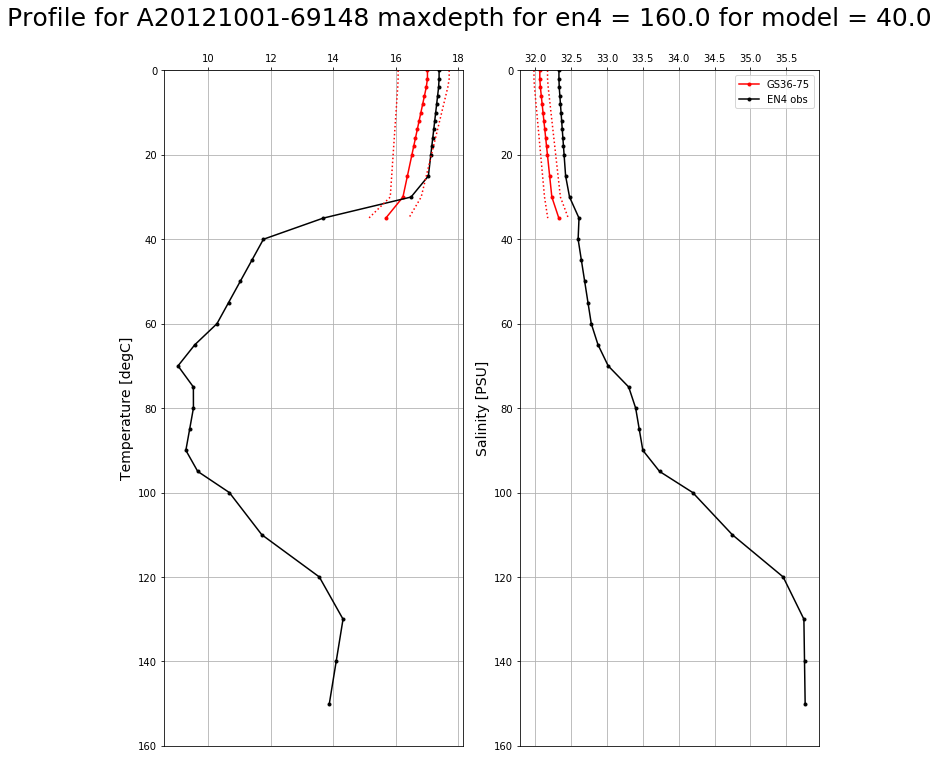

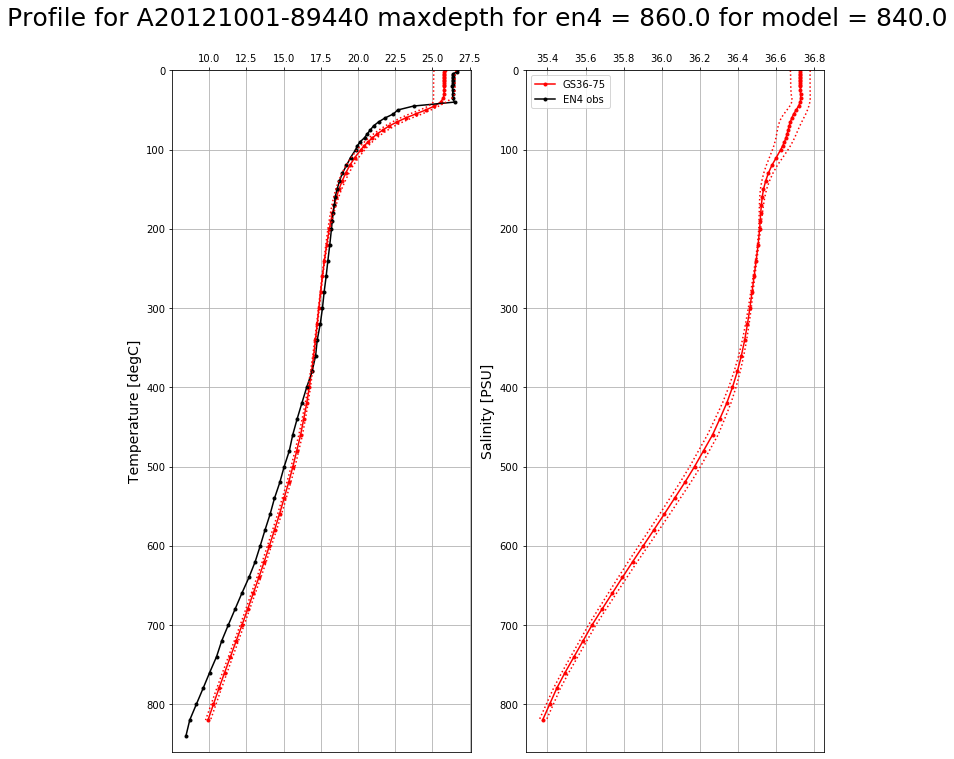

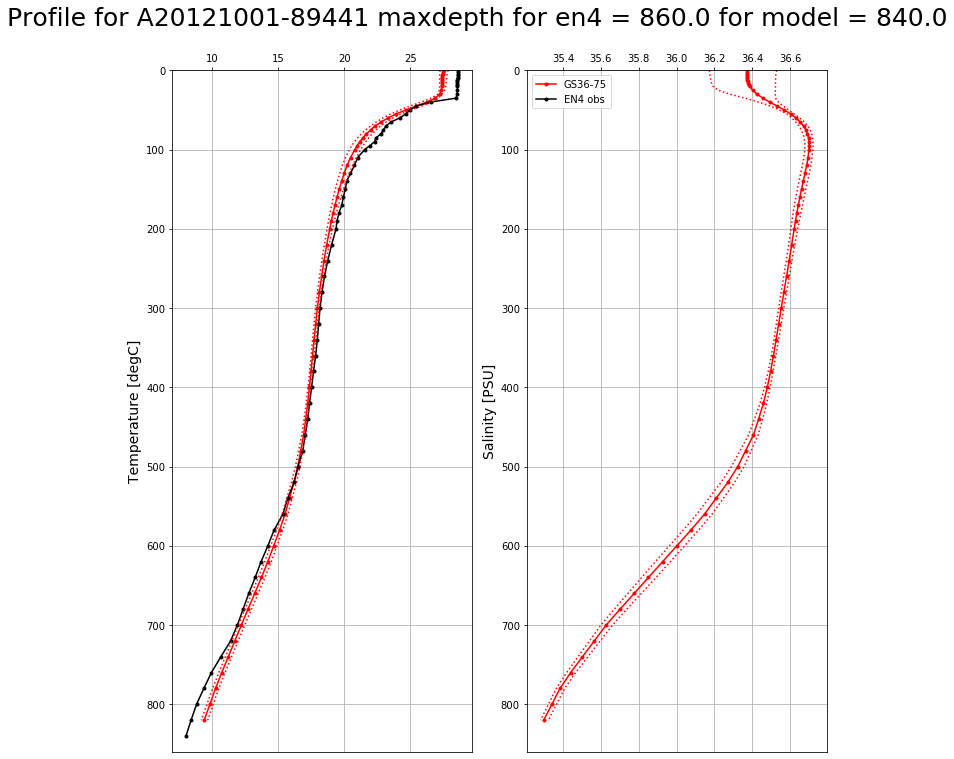

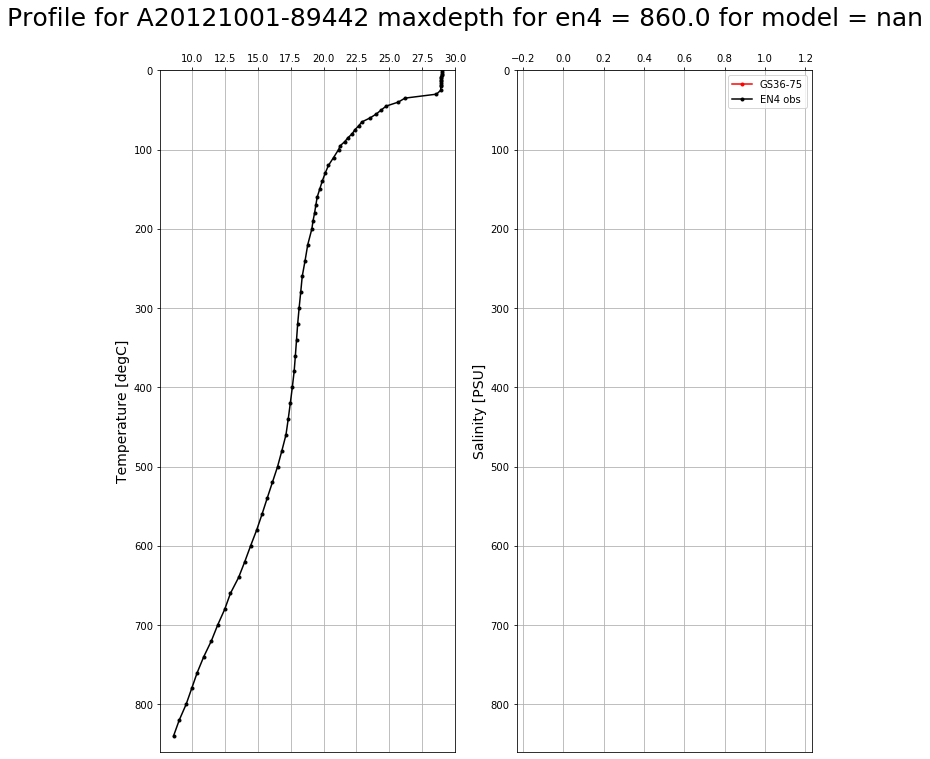

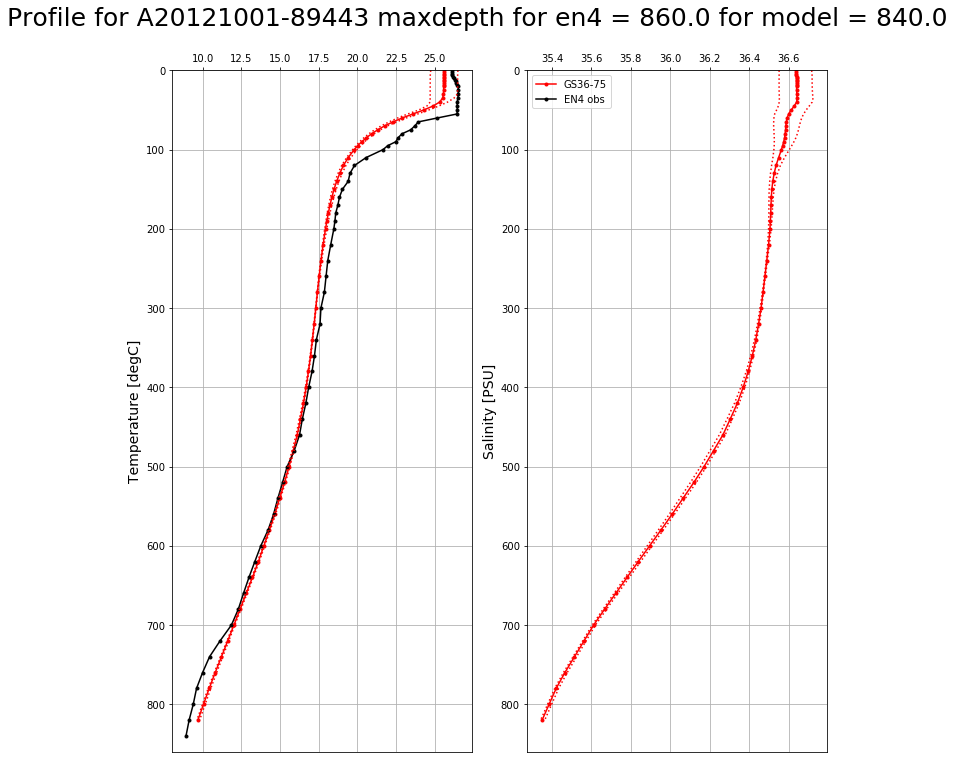

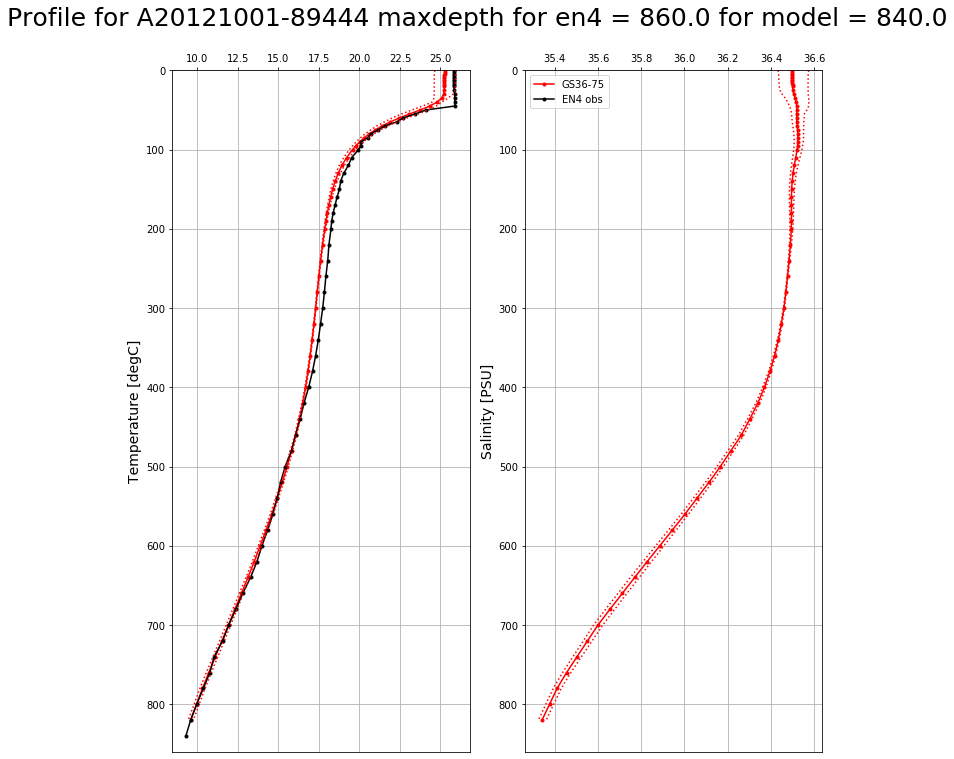

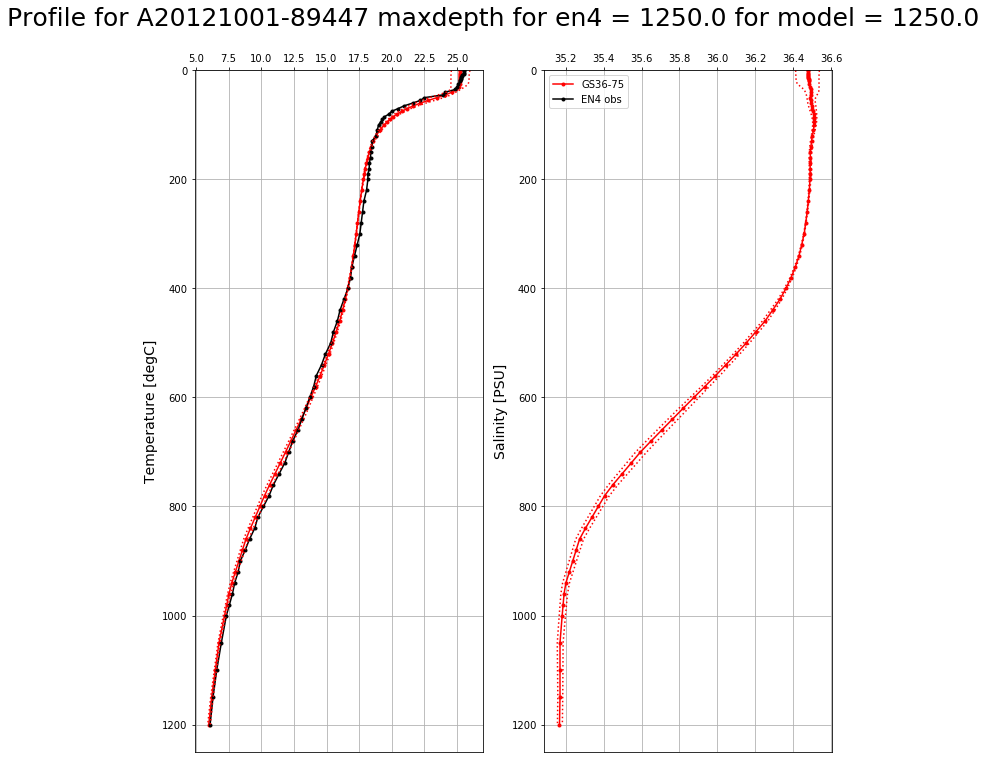

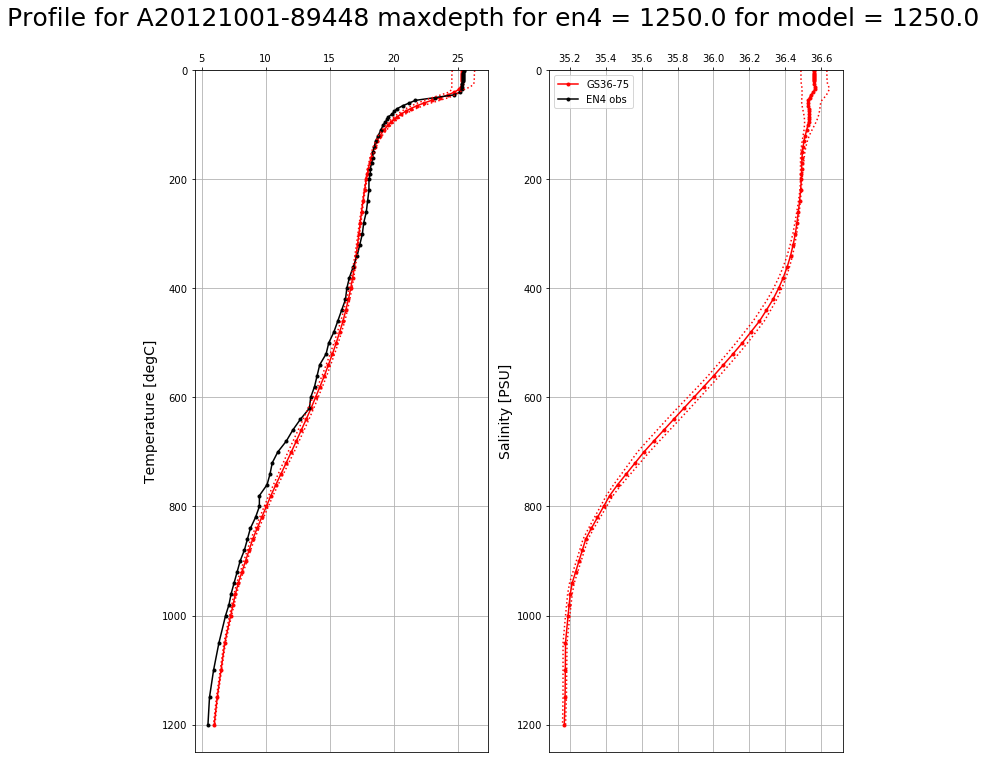

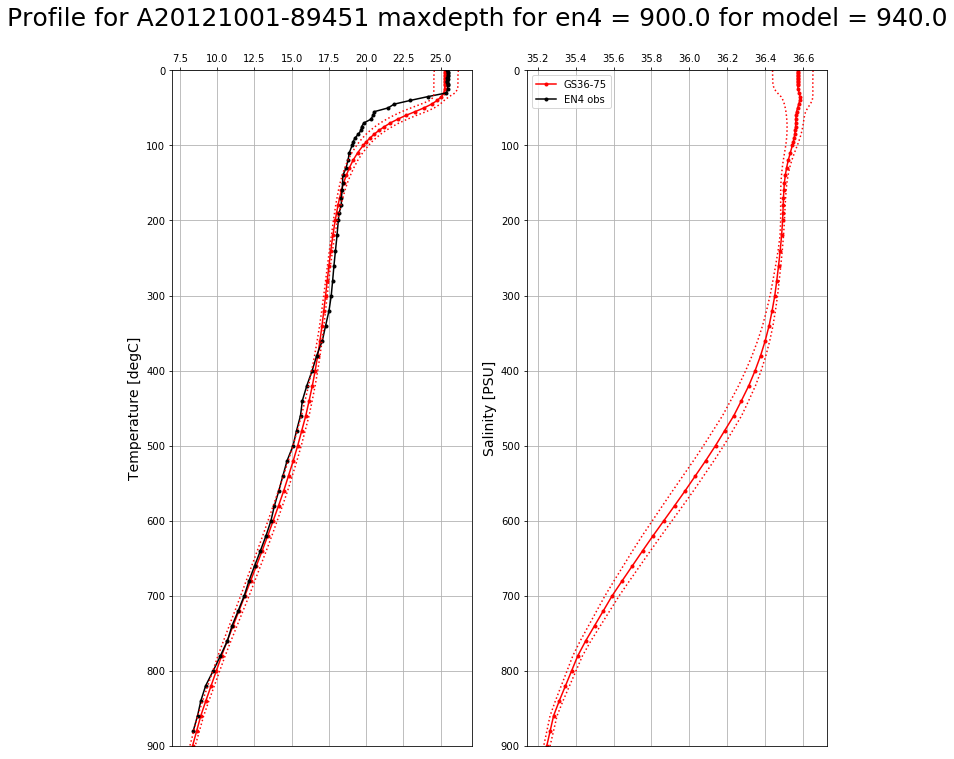

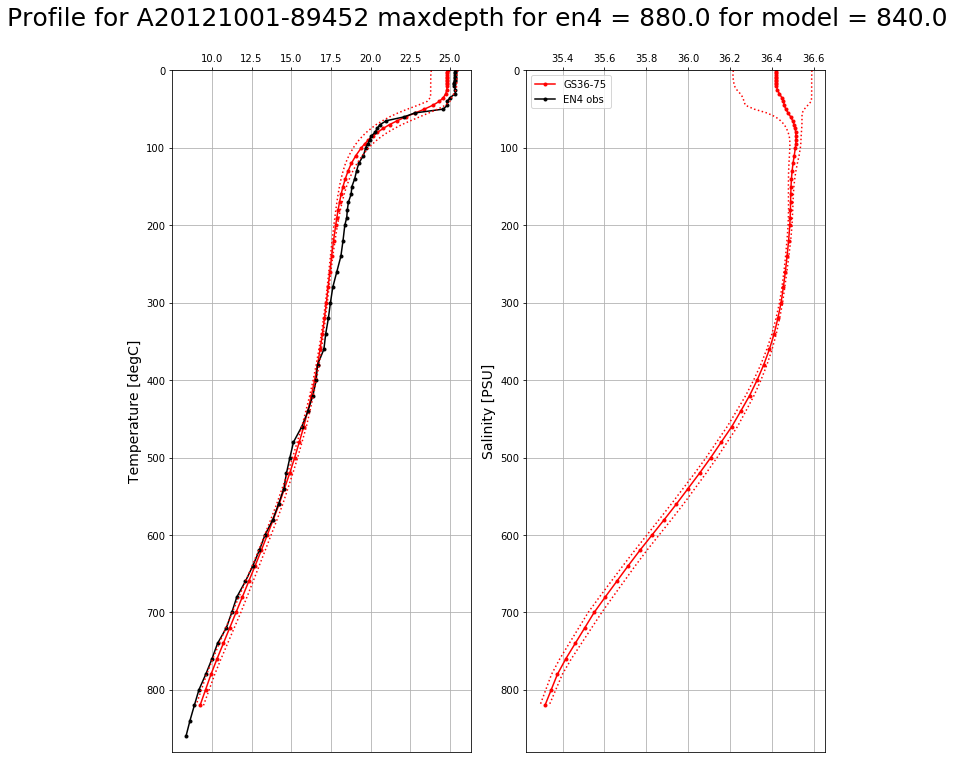

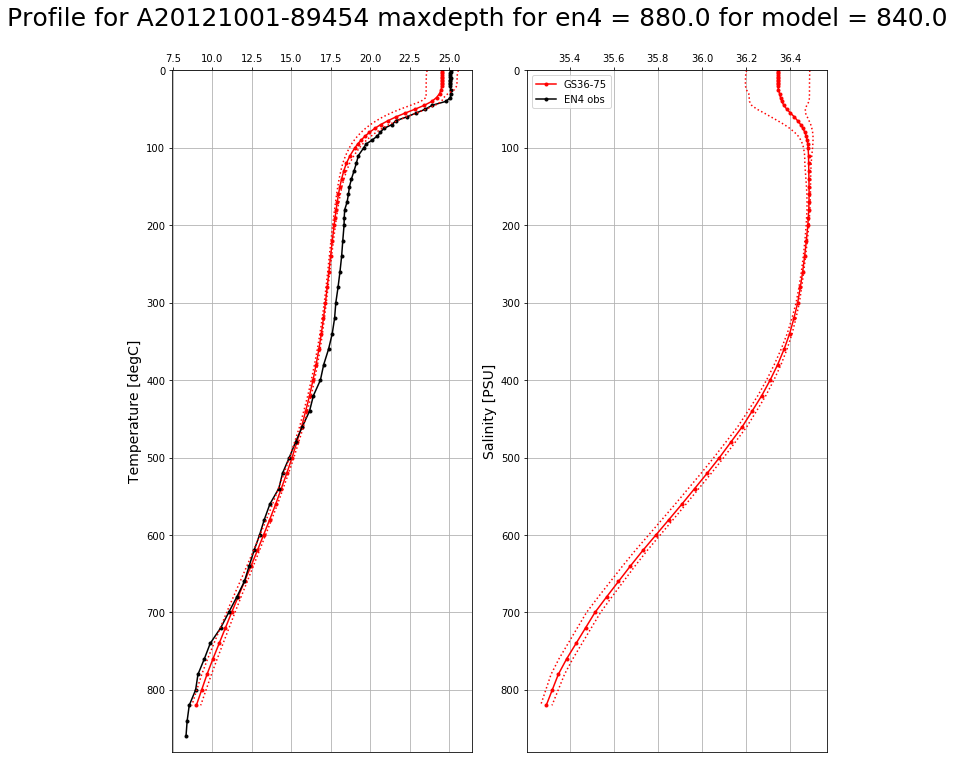

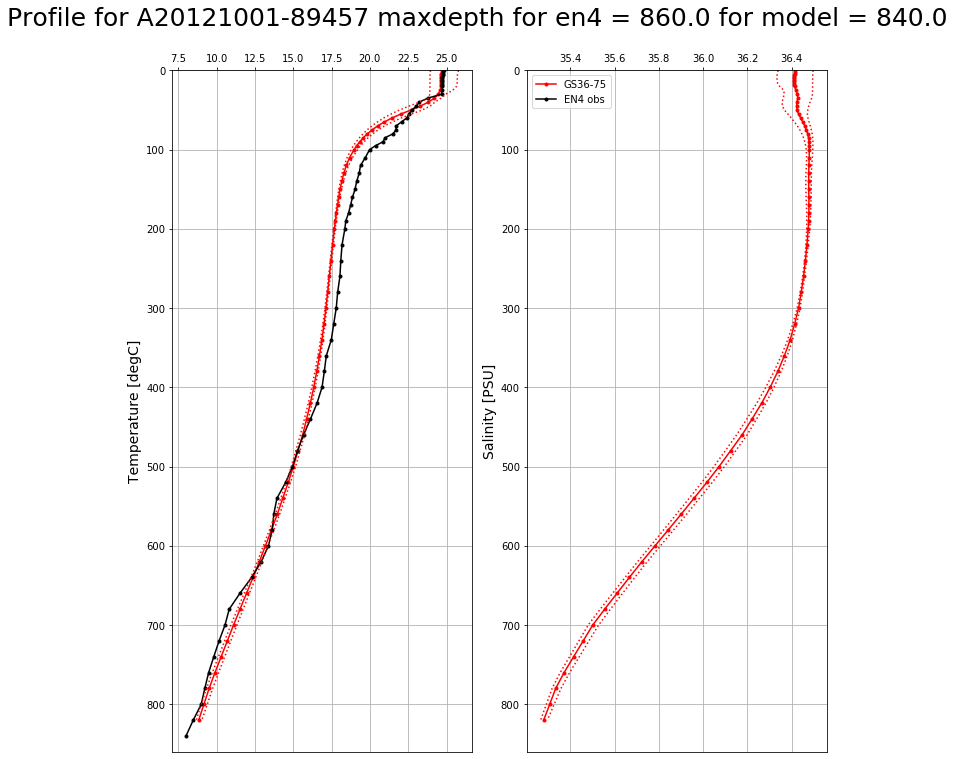

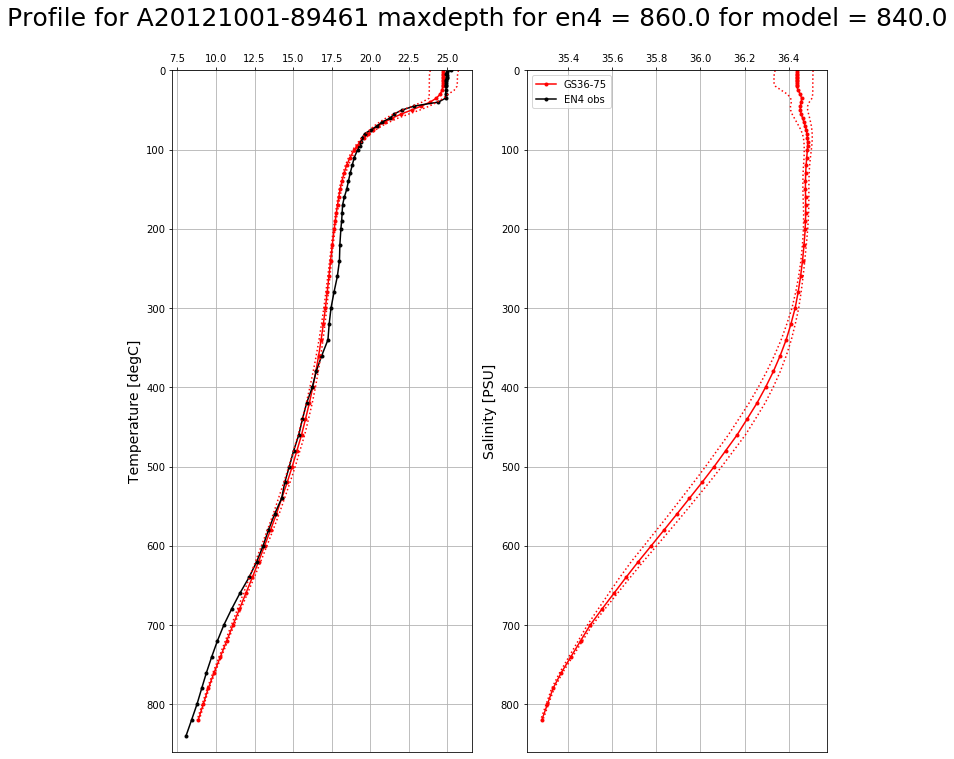

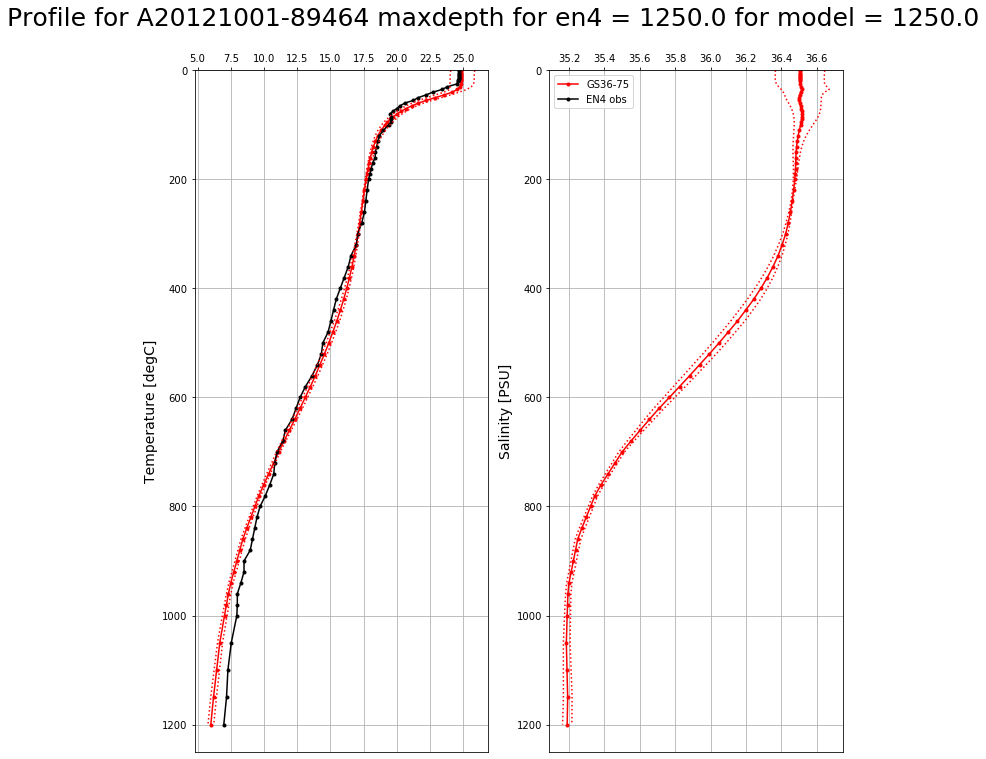

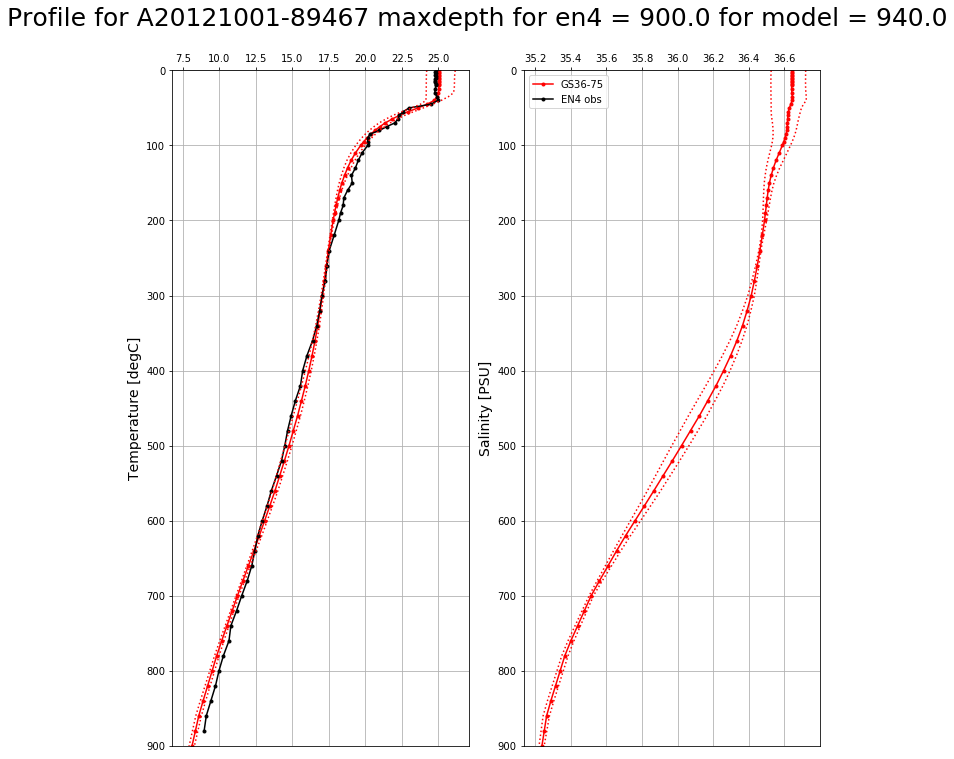

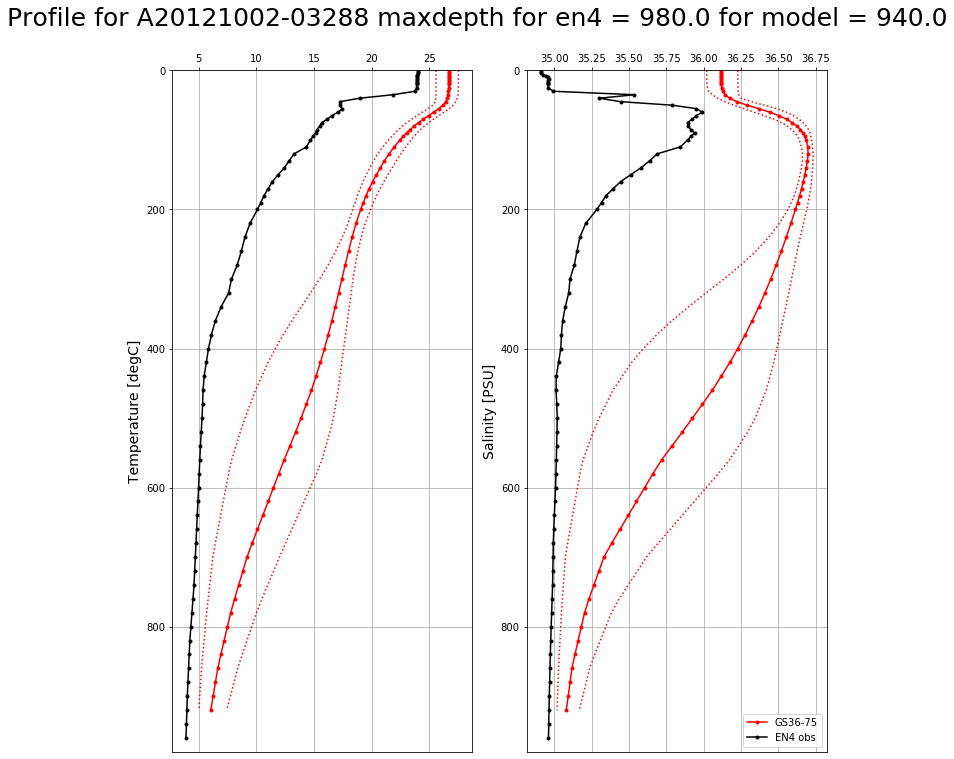

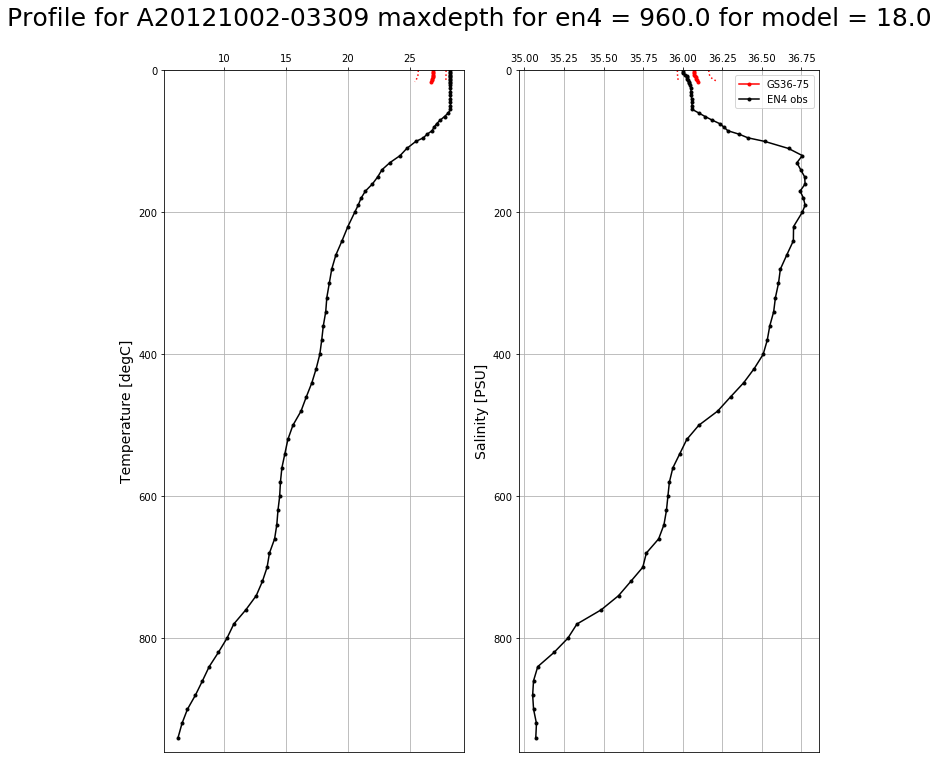

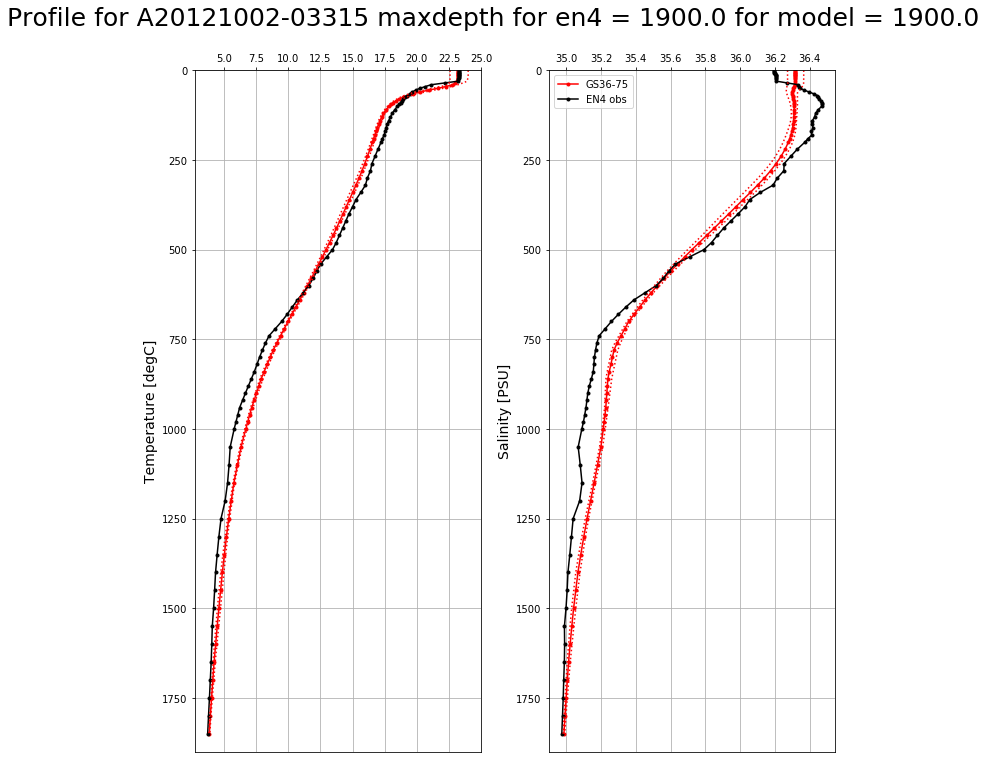

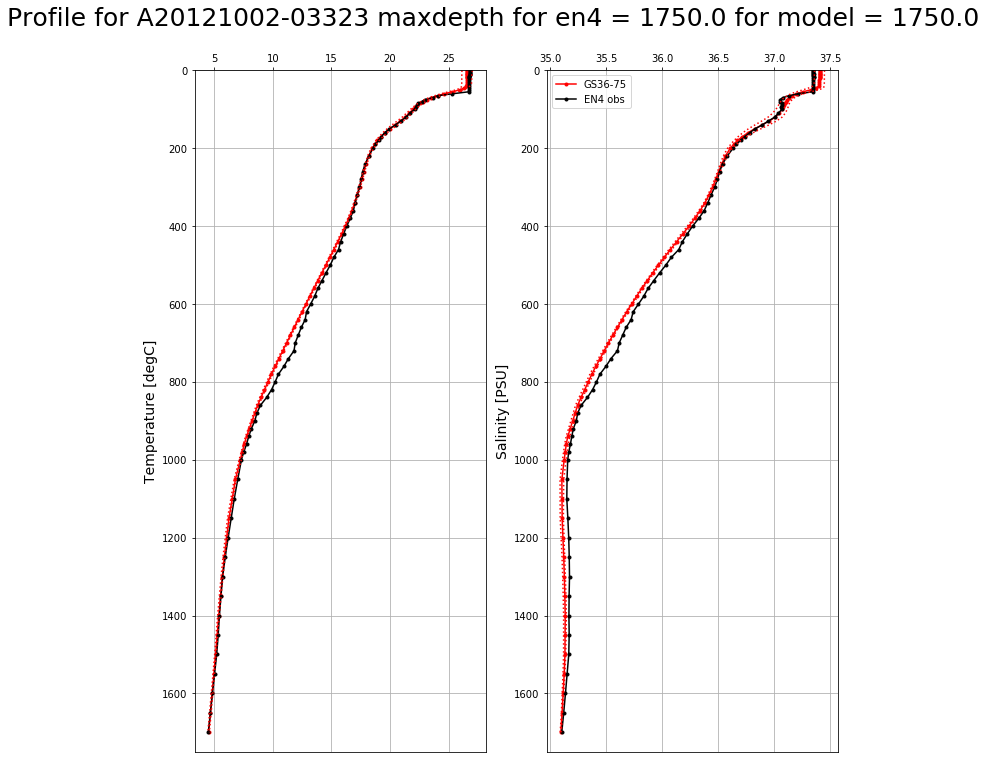

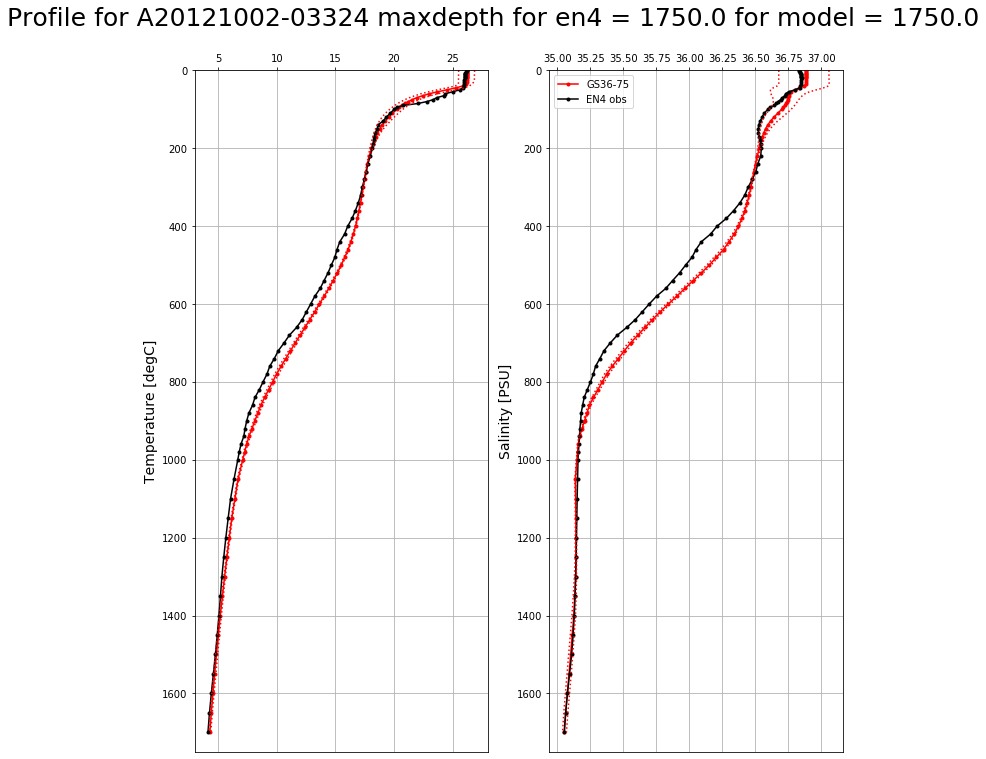

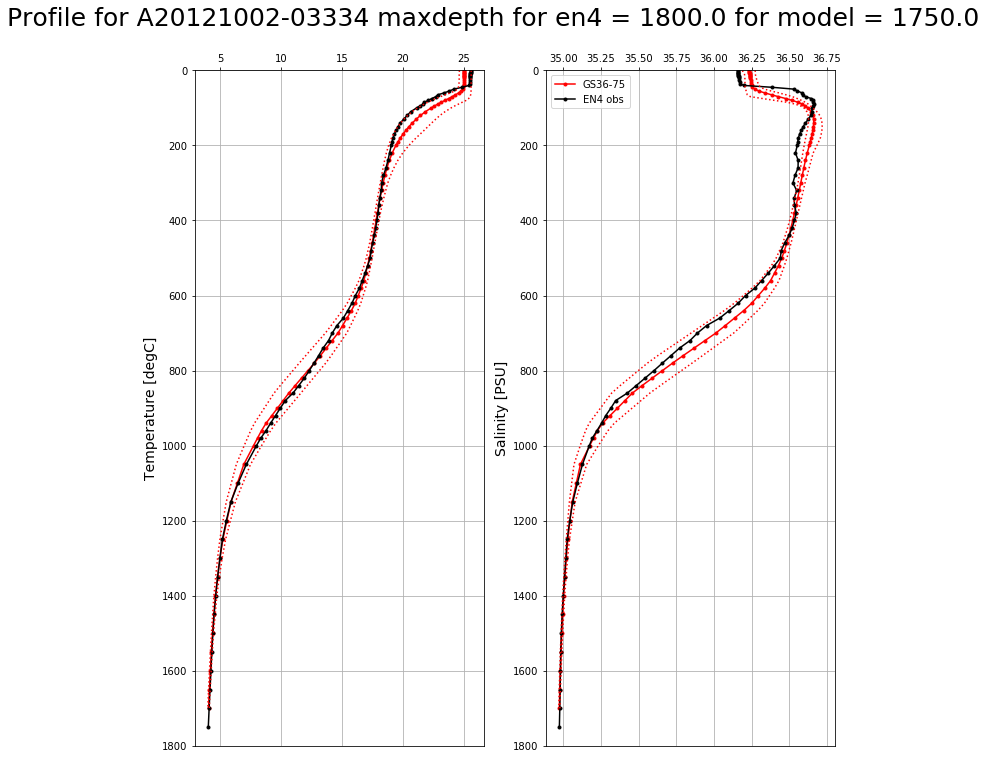

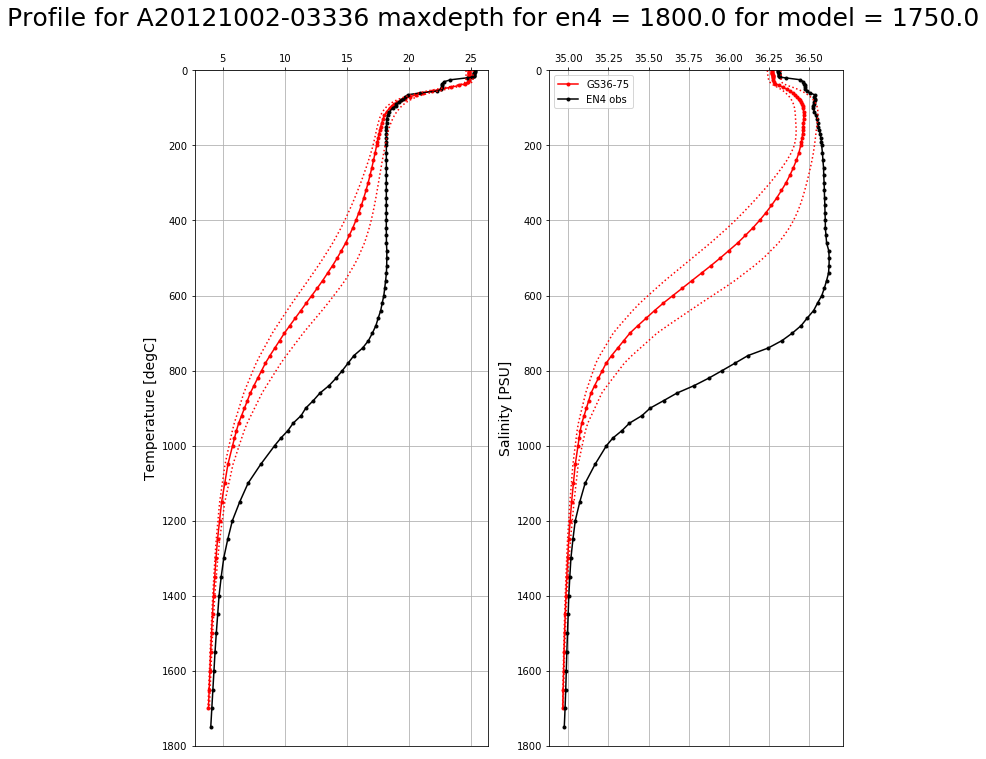

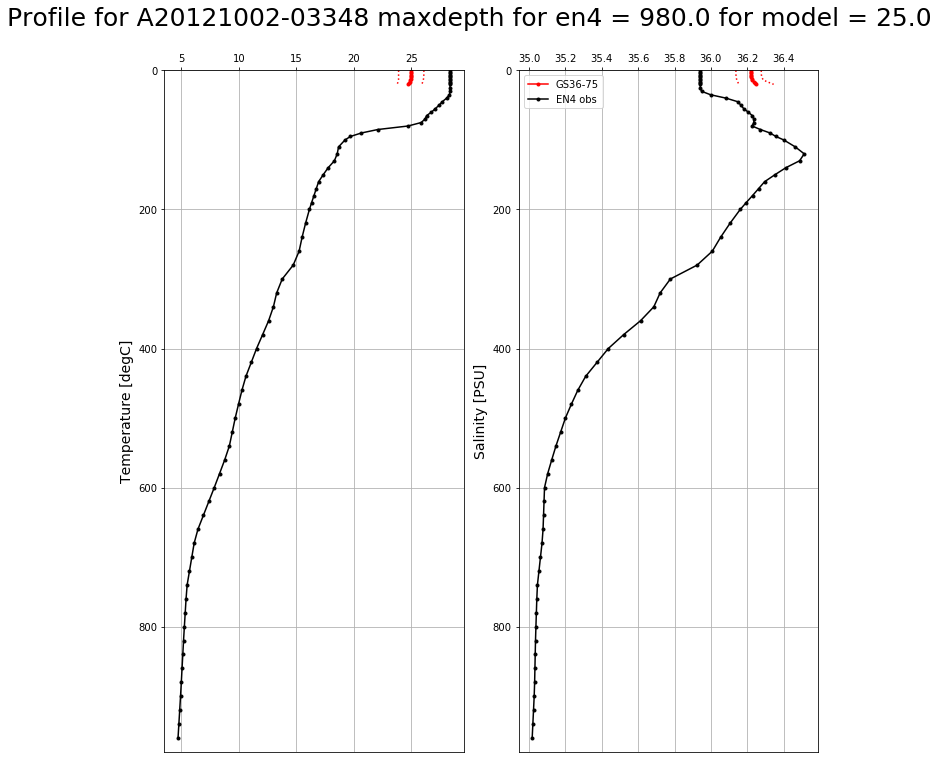

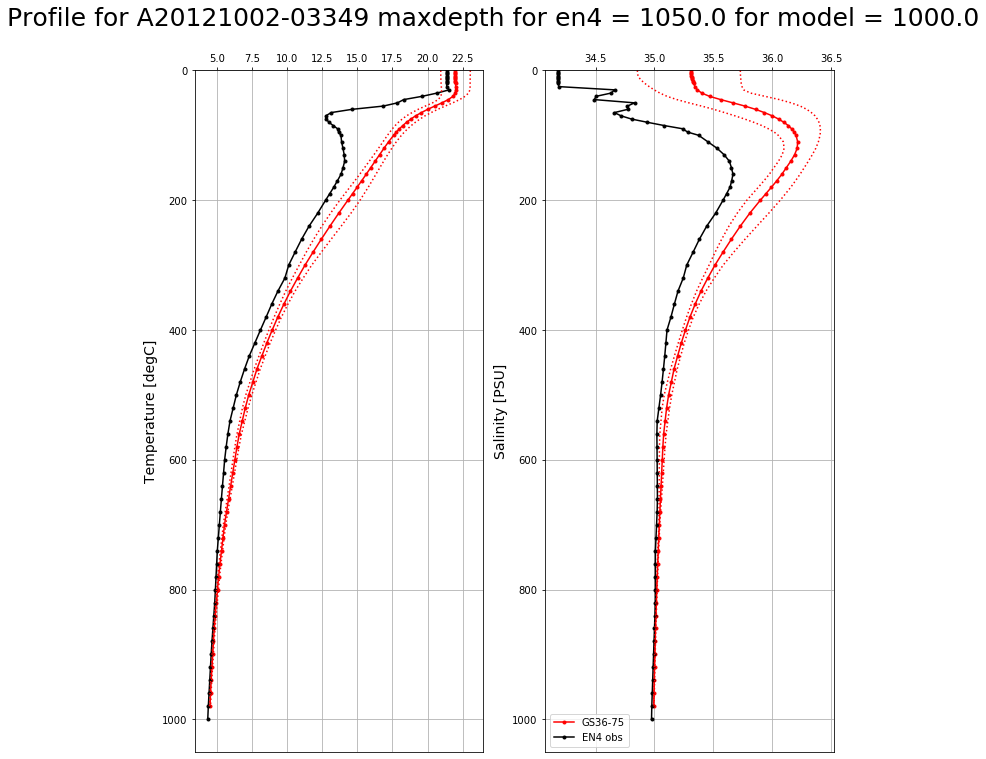

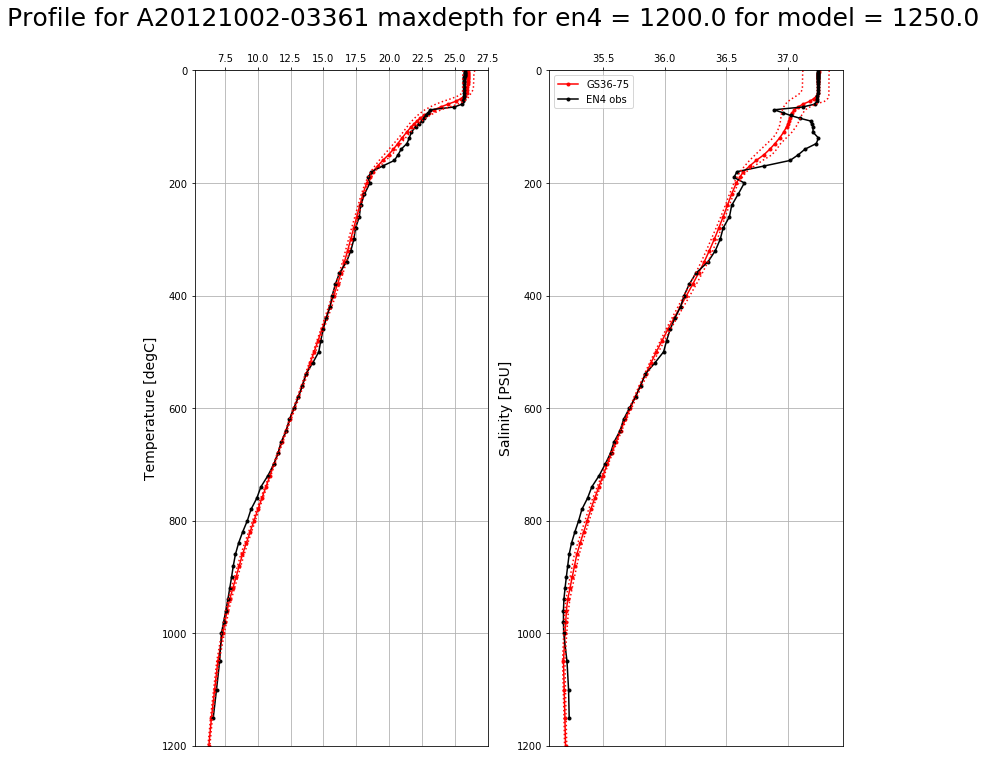

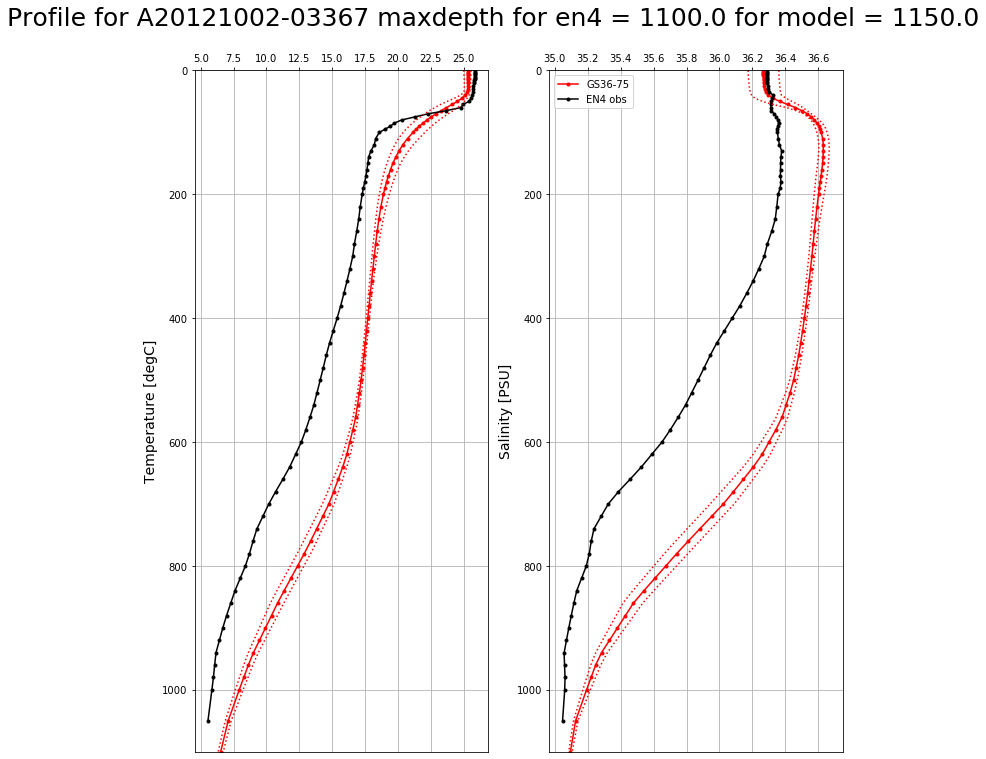

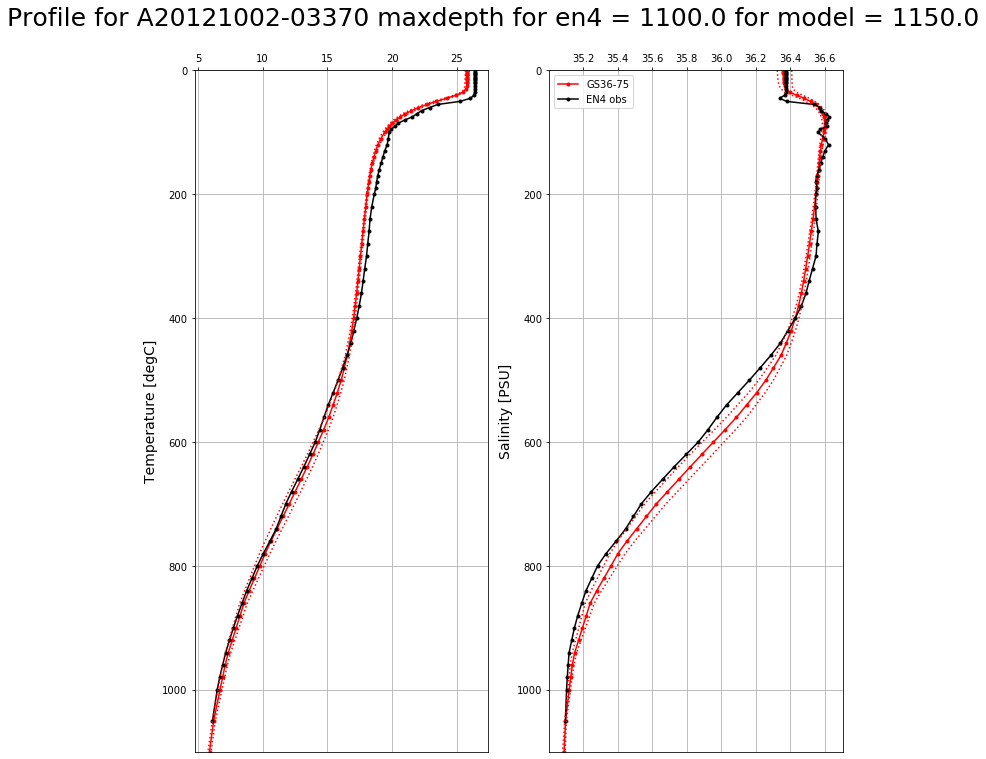

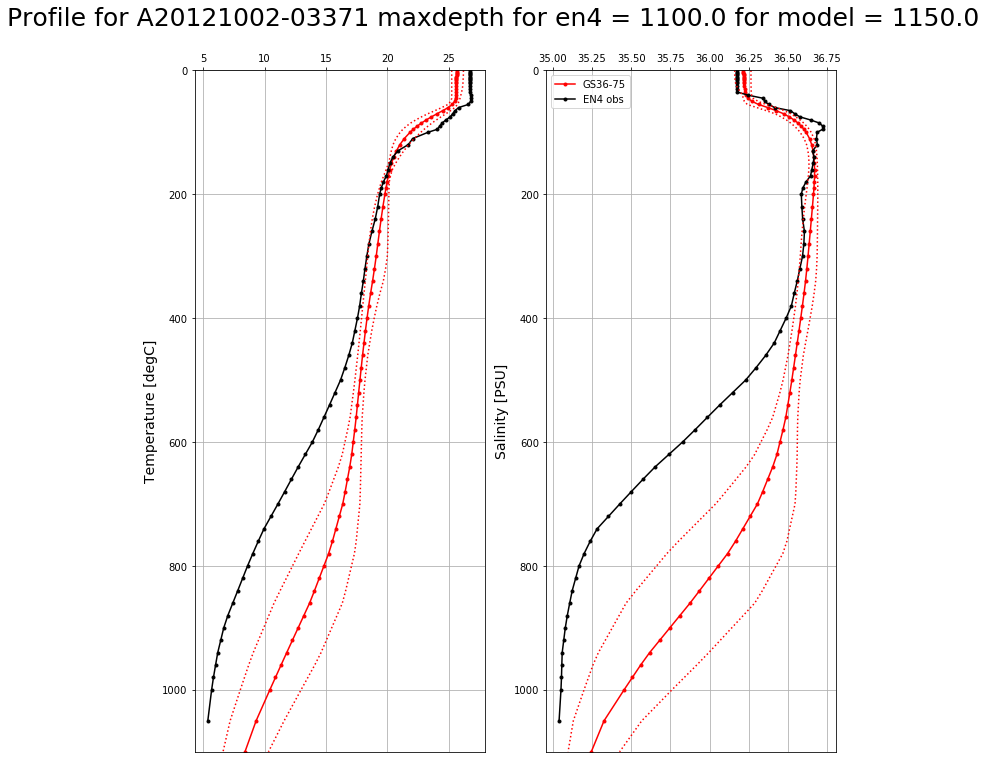

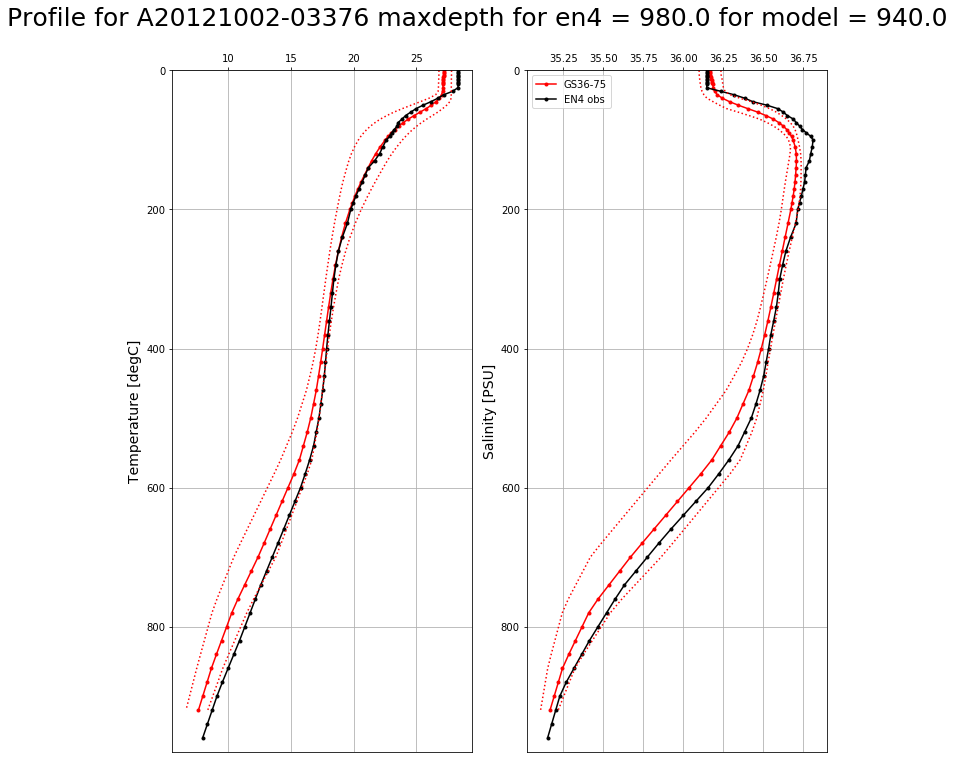

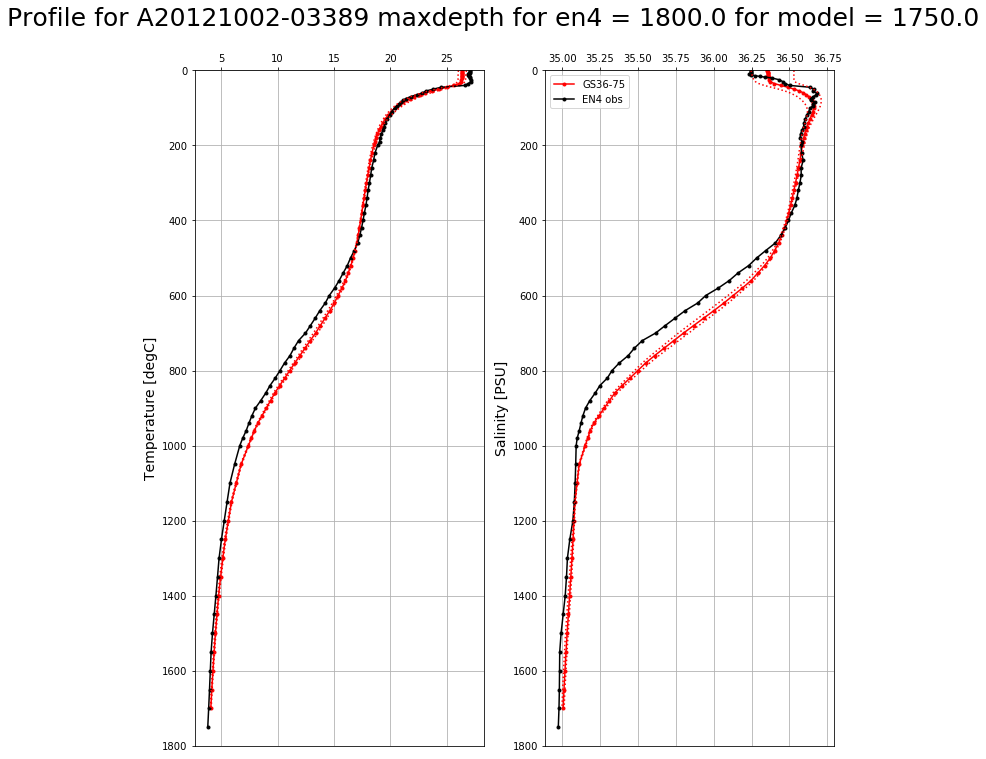

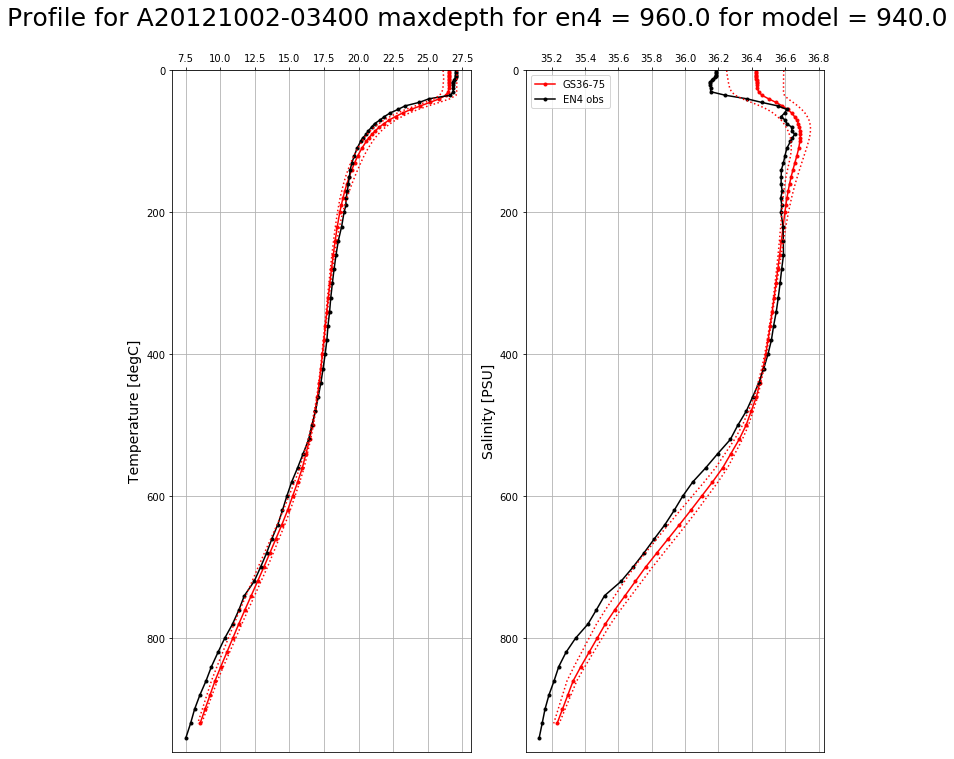

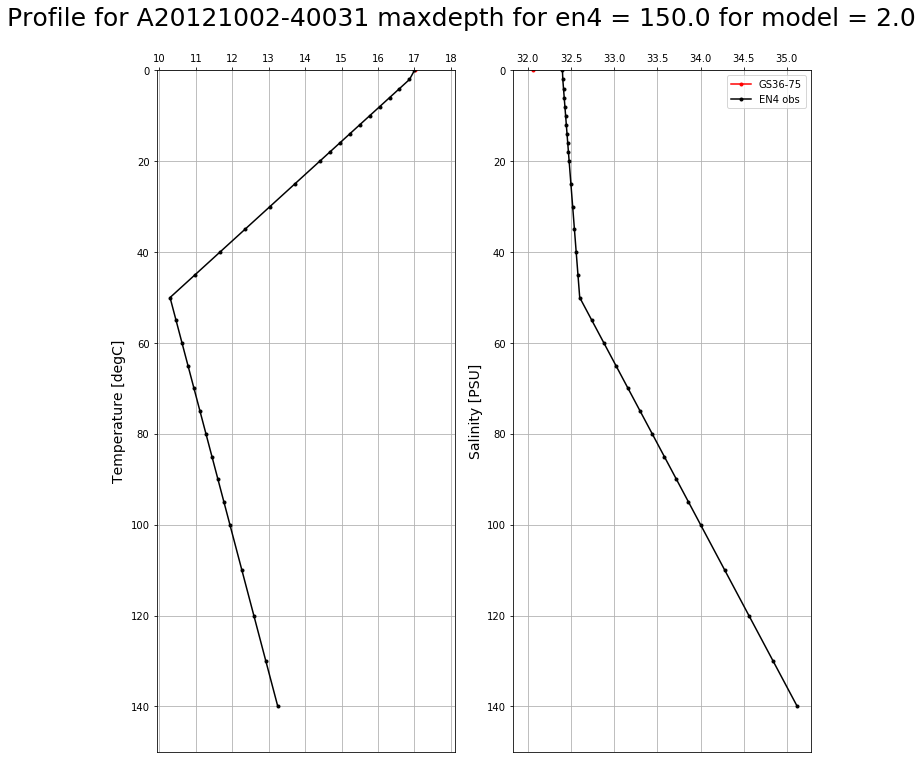

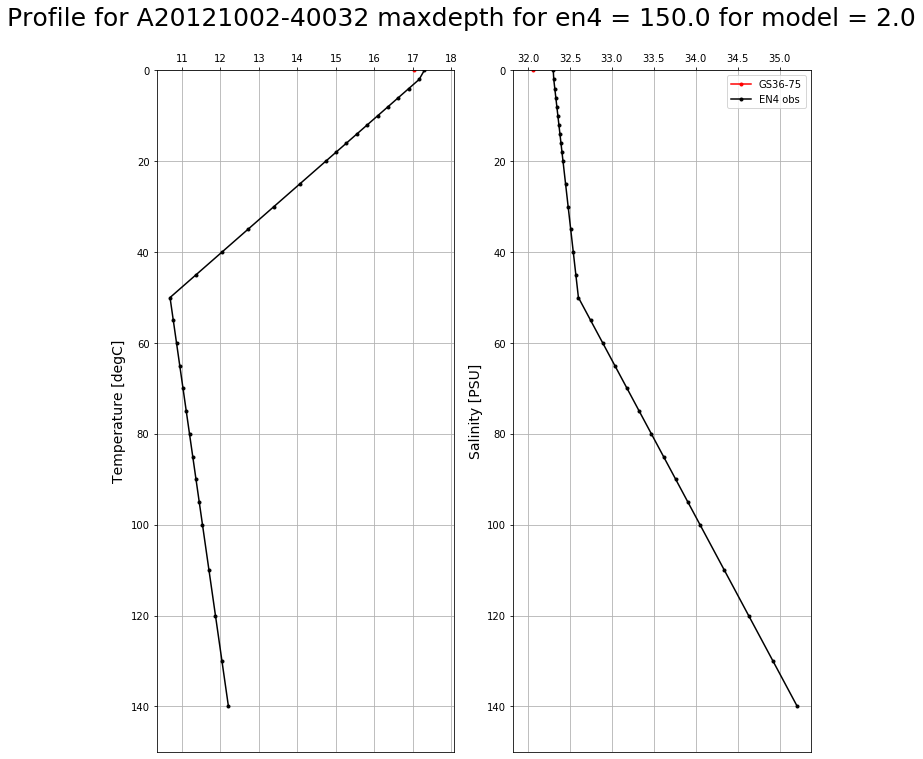

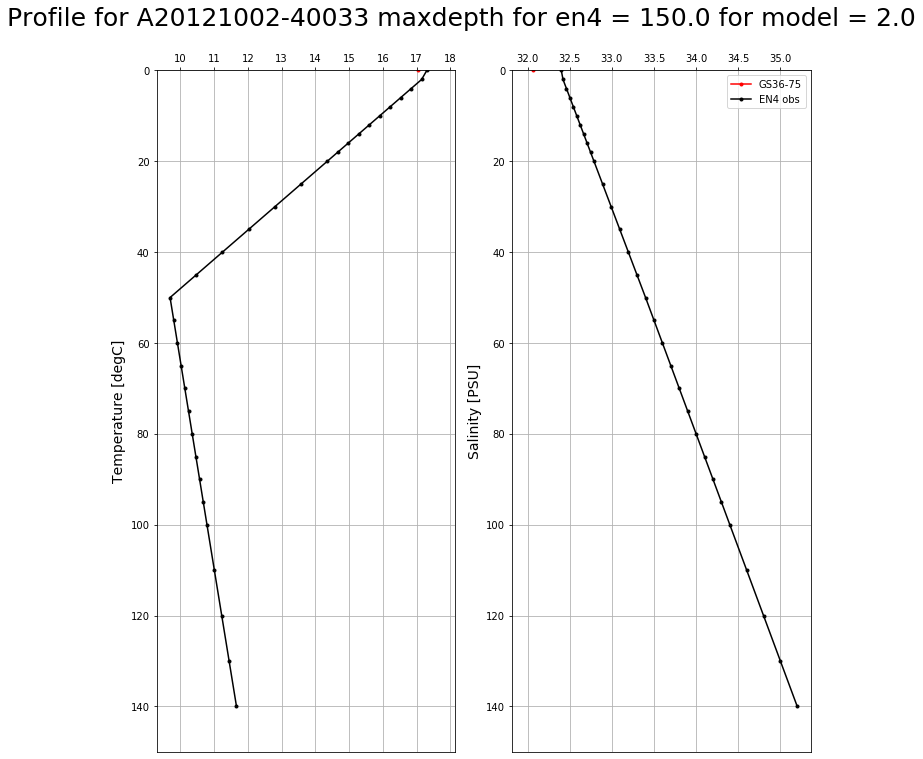

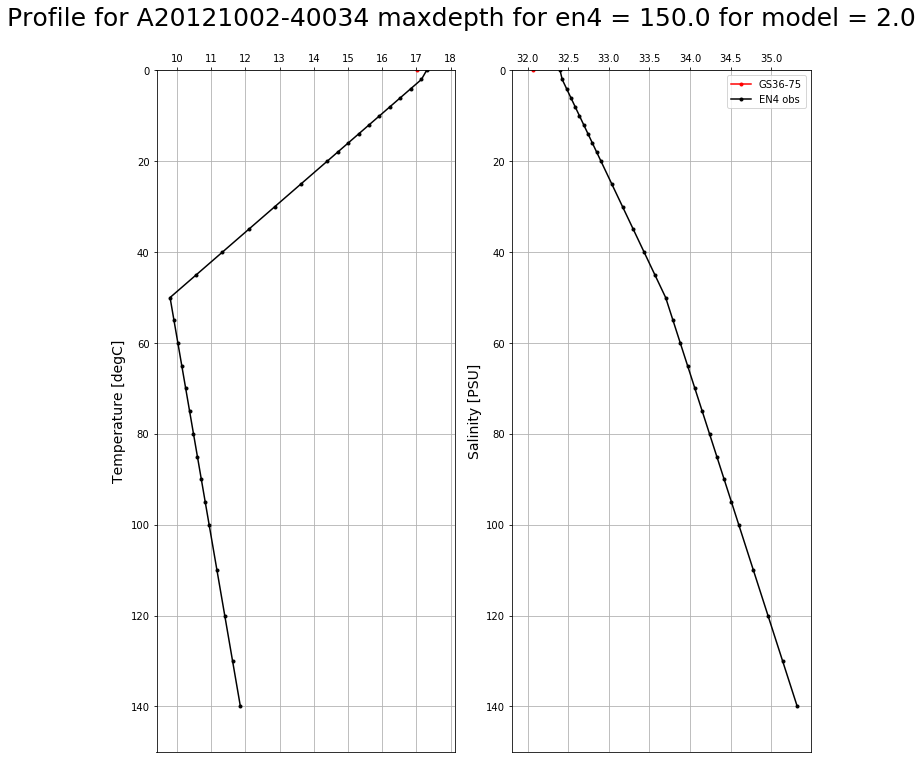

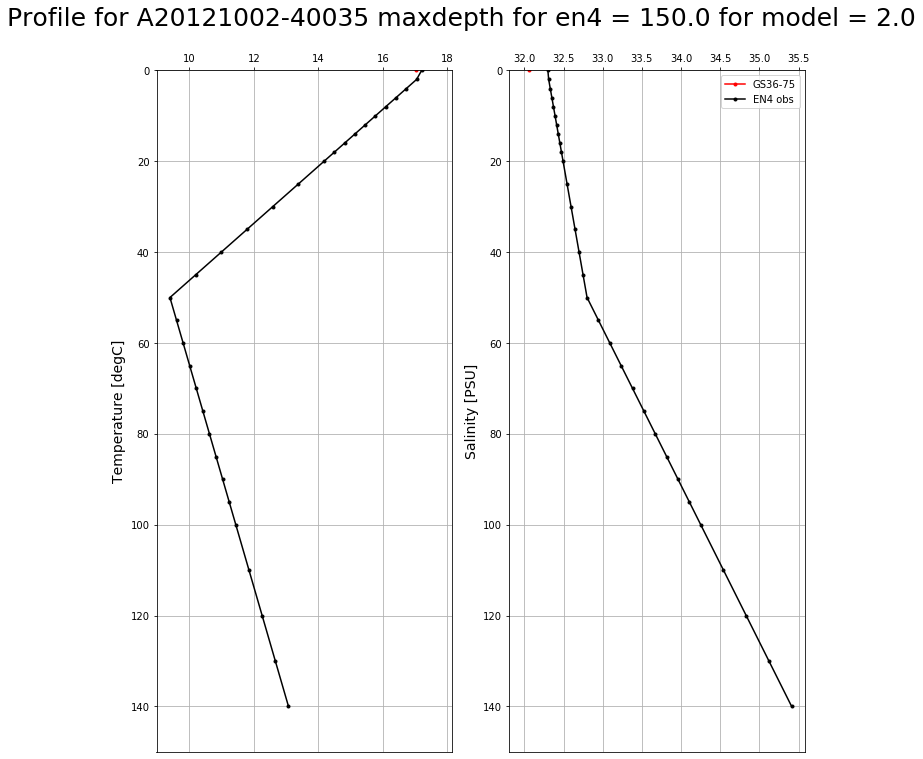

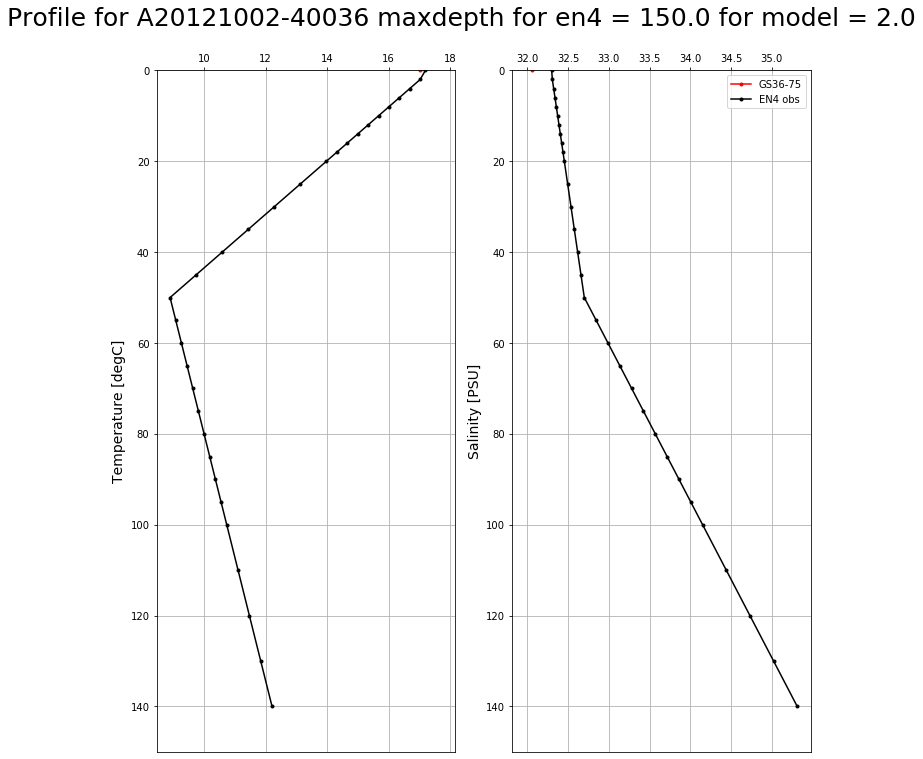

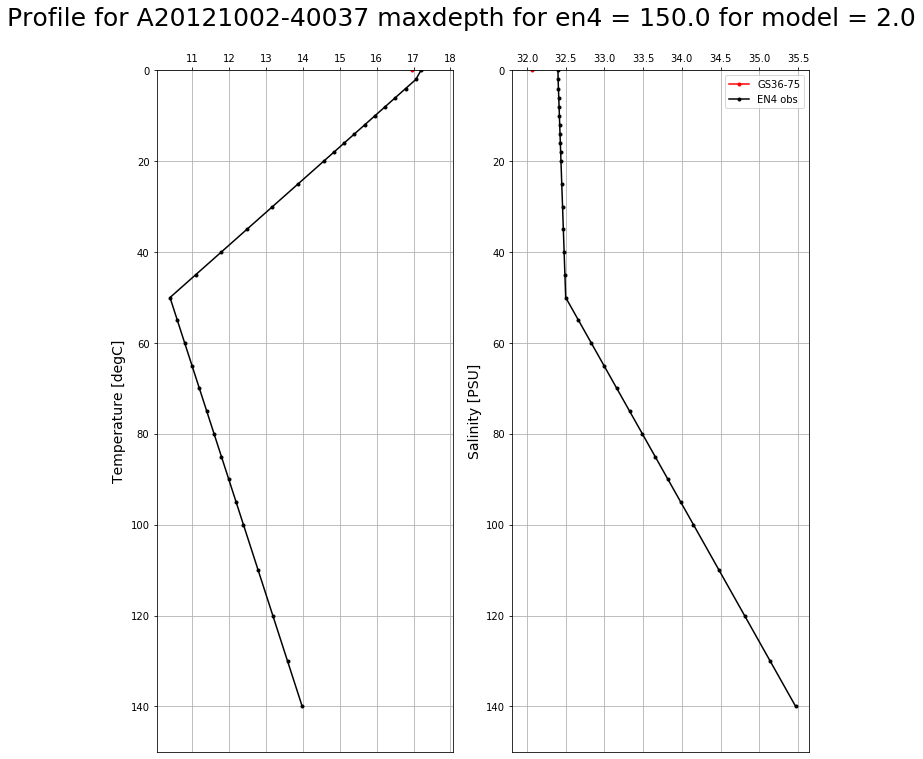

In [17]:
    namezone='NATL60-CJM165_'+reg+'_y2012-2013'
    jsonfile='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/NATL60-CJM165_'+reg+'_y2012-2013_final.json'
    dirn='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/'+config+'-'+case+'/'    
    
    #averaging the data in boxes

    vert_standart=[0,2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,190,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000]

    def get_netcdf_profiles(netcdf_name):

        dsprof=xr.open_dataset(netcdf_name)
        depth=dsprof['depth_en4']
        temp_en4=dsprof['temp_profileEN4']
        salt_en4=dsprof['salt_profileEN4']
        mean_temp_model=dsprof['mean_temp_model']
        mean_salt_model=dsprof['mean_salt_model']
        percent10_temp_model=dsprof['percent10_temp_model']
        percent10_salt_model=dsprof['percent10_salt_model']
        percent90_temp_model=dsprof['percent90_temp_model']
        percent90_salt_model=dsprof['percent90_salt_model']

        return depth,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model


    sourcefile=open(jsonfile,'rU')
    infos=json.load(sourcefile)
    nb_profilesEN4=len(infos)


    for prof in np.arange(100):
        list_profiles = infos.keys()
        reference = str(list(list_profiles)[prof])
        reference_profile=reference[-16:-1]
        outname=dirn+"/profiles_EN4-"+reference_profile+"_"+config+"-"+case+"_TS_vert-stand.nc"

        if os.path.exists(outname):
            depth,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model = get_netcdf_profiles(outname)
            ien4=np.where(np.isnan(temp_en4)==True)
            imod=np.where(np.isnan(mean_temp_model)==True)

            if len(ien4[:][0]) >0:
                d=depth[np.min(ien4[:][0])].values
            else:
                d=2000
            if d>100:
                dm=depth[np.min(imod[:][0])].values
                plot_prof(d,dm,reference_profile,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model)


In [3]:
import numpy as np
truc=200-np.nan

In [4]:
if np.abs(truc) < 10:
    print('inferieur')
else:
    print('superieur')

superieur


In [5]:
machin=[np.nan,np.nan,np.nan]
id=np.where(np.isnan(machin)==True)

In [6]:
id

(array([0, 1, 2]),)

In [8]:
len(id[:][0])

3